# Module 10: Statistical Foundations

**Objective:** Understand key statistical concepts fundamental to data science and learn how to apply them to real-world data analysis.

## Contents
1. [Introduction and Setup](#introduction-and-setup)
2. [Importance of Statistics in Data Science](#importance-of-statistics-in-data-science)
   - [The Role of Statistics in the Data Science Workflow](#the-role-of-statistics-in-the-data-science-workflow)
   - [Statistical Thinking vs. Machine Learning](#statistical-thinking-vs-machine-learning)
   - [Key Statistical Concepts for Data Scientists](#key-statistical-concepts-for-data-scientists)
3. [Types of Data and Measurement Scales](#types-of-data-and-measurement-scales)
   - [Categorical Data](#categorical-data)
   - [Numerical Data](#numerical-data)
   - [Measurement Scales](#measurement-scales)
   - [Identifying Data Types in Practice](#identifying-data-types-in-practice)
   - [Exercises: Data Types](#exercises-data-types)
4. [Measures of Central Tendency](#measures-of-central-tendency)
   - [Mean](#mean)
   - [Median](#median)
   - [Mode](#mode)
   - [When to Use Each Measure](#when-to-use-each-measure)
   - [Impact of Outliers](#impact-of-outliers)
   - [Exercises: Central Tendency](#exercises-central-tendency)
5. [Measures of Dispersion](#measures-of-dispersion)
   - [Range](#range)
   - [Interquartile Range (IQR)](#interquartile-range-iqr)
   - [Variance](#variance)
   - [Standard Deviation](#standard-deviation)
   - [Coefficient of Variation](#coefficient-of-variation)
   - [Exercises: Dispersion](#exercises-dispersion)
6. [Measures of Shape](#measures-of-shape)
   - [Skewness](#skewness)
   - [Kurtosis](#kurtosis)
   - [Modality](#modality)
   - [Visualizing Distribution Shapes](#visualizing-distribution-shapes)
   - [Exercises: Shape](#exercises-shape)
7. [Practical Exercise: Statistical Analysis of Real Data](#practical-exercise-statistical-analysis-of-real-data)
   - [Descriptive Statistics](#descriptive-statistics)
   - [Data Visualization](#data-visualization)
   - [Statistical Insights](#statistical-insights)
   - [Comprehensive Analysis](#comprehensive-analysis)
8. [Summary and Next Steps](#summary-and-next-steps)

## Introduction and Setup

Let's start by importing the necessary libraries and setting up our environment:

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('tab10')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [4]:
# Load datasets for our examples and exercises
from sklearn.datasets import fetch_california_housing, load_iris, load_diabetes

In [5]:
# California Housing dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

# Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Diabetes dataset
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['progression'] = diabetes.target

# Create a synthetic customer dataset
np.random.seed(42)
n_samples = 1000

customer_df = pd.DataFrame({
    'customer_id': range(1, n_samples + 1),
    'age': np.random.normal(35, 12, n_samples).clip(18, 80).astype(int),
    'income': np.random.lognormal(10.5, 0.5, n_samples),
    'spending': np.random.lognormal(6, 0.5, n_samples),
    'family_size': np.random.choice([1, 2, 3, 4, 5, 6], n_samples, p=[0.3, 0.3, 0.2, 0.1, 0.07, 0.03]),
    'education_level': np.random.choice(['High School', 'Associate', 'Bachelor', 'Master', 'PhD'], n_samples, 
                                      p=[0.3, 0.2, 0.3, 0.15, 0.05]),
    'customer_tenure': np.random.gamma(5, 6, n_samples).clip(0, 60).astype(int),
    'satisfaction_score': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.05, 0.1, 0.2, 0.4, 0.25]),
    'has_credit_card': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
    'num_transactions': np.random.poisson(15, n_samples)
})

In [6]:
# Add some correlations between variables to make the data more realistic
customer_df['spending'] = customer_df['spending'] * (1 + 0.3 * (customer_df['income'] - customer_df['income'].mean()) / customer_df['income'].std())
customer_df['spending'] = customer_df['spending'] * (1 + 0.2 * (customer_df['age'] - customer_df['age'].mean()) / customer_df['age'].std())
customer_df['spending'] = customer_df['spending'] * (1 + 0.1 * (customer_df['family_size'] - customer_df['family_size'].mean()) / customer_df['family_size'].std())

In [7]:
print("California Housing Dataset Shape:", california_df.shape)
print("Iris Dataset Shape:", iris_df.shape)
print("Diabetes Dataset Shape:", diabetes_df.shape)
print("Customer Dataset Shape:", customer_df.shape)

California Housing Dataset Shape: (20640, 9)
Iris Dataset Shape: (150, 5)
Diabetes Dataset Shape: (442, 11)
Customer Dataset Shape: (1000, 10)


In [8]:
# Show the first few rows of the customer dataset
print("\nCustomer Dataset Preview:")
customer_df.head()


Customer Dataset Preview:


customer_id  age        income    spending  family_size education_level  \
0            1   40  73106.877027  495.309585            4          Master   
1            2   33  57659.877200  552.058602            6     High School   
2            3   42  37414.558971  254.445876            1          Master   
3            4   53  26279.162694  427.405831            5        Bachelor   
4            5   32  51488.391671  160.634625            2     High School   

   customer_tenure  satisfaction_score  has_credit_card  num_transactions  
0               39                   4                1                12  
1               21                   5                1                14  
2               15                   3                1                16  
3               21                   4                1                15  
4               40                   4                1                16

In [9]:
# Show the first few rows of the California Housing dataset
print("\nCalifornia Housing Dataset Preview:")
california_df.head()


California Housing Dataset Preview:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

Now let's dive into the fundamentals of statistics for data science.

## Importance of Statistics in Data Science

Statistics forms the foundation of data science, providing the framework and tools needed to extract insights from data.

### The Role of Statistics in the Data Science Workflow

Statistics plays a crucial role at every stage of the data science workflow:

1. **Data Collection and Sampling**
   - Statistical sampling methods ensure we collect representative data
   - Power analysis helps determine appropriate sample sizes
   - Survey design principles help minimize biases

2. **Data Exploration and Cleaning**
   - Descriptive statistics summarize key properties of data
   - Outlier detection methods identify anomalous observations
   - Missing data analysis guides appropriate imputation strategies

3. **Feature Engineering and Selection**
   - Correlation analysis reveals relationships between variables
   - Dimensionality reduction techniques identify important features
   - Transformation methods improve data properties for modeling

4. **Model Building and Evaluation**
   - Statistical models serve as baselines for more complex algorithms
   - Hypothesis tests validate model assumptions
   - Confidence intervals quantify uncertainty in predictions

5. **Communication of Results**
   - Statistical visualizations convey key findings
   - P-values and effect sizes communicate significance
   - Uncertainty metrics provide context for predictions

In [10]:
# Let's visualize the data science workflow
workflow_stages = ['Data Collection', 'Data Exploration', 'Feature Engineering', 
                  'Model Building', 'Result Communication']
stats_importance = [0.8, 0.9, 0.7, 0.6, 0.7]  # Subjective measure of statistics importance

plt.figure(figsize=(12, 6))
plt.bar(workflow_stages, stats_importance, color='skyblue', edgecolor='navy')
plt.xlabel('Data Science Workflow Stage')
plt.ylabel('Importance of Statistical Knowledge (0-1)')
plt.title('The Role of Statistics Throughout the Data Science Workflow')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(stats_importance):
    plt.text(i, v + 0.03, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Statistical Thinking vs. Machine Learning

While machine learning has revolutionized data science, statistical thinking remains essential:

| Statistical Approach | Machine Learning Approach |
|----------------------|---------------------------|
| Focuses on inference and understanding relationships | Focuses on prediction accuracy |
| Emphasizes model interpretability | Emphasizes model performance |
| Quantifies uncertainty explicitly | Often treats uncertainty implicitly |
| Tests specific hypotheses | Discovers patterns from data |
| Requires domain knowledge and careful design | Can work with minimal domain knowledge |

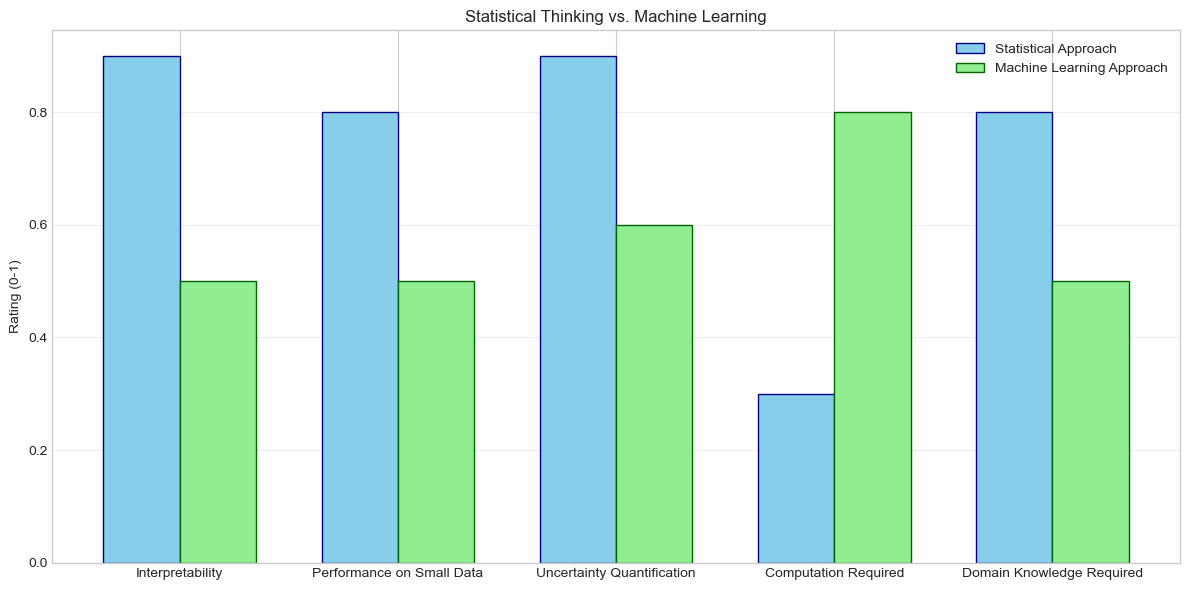

In [11]:
# Let's visualize a comparison
comparison_metrics = ['Interpretability', 'Performance on Small Data', 
                      'Uncertainty Quantification', 'Computation Required', 
                      'Domain Knowledge Required']

stat_ratings = [0.9, 0.8, 0.9, 0.3, 0.8]
ml_ratings = [0.5, 0.5, 0.6, 0.8, 0.5]

x = np.arange(len(comparison_metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
stats_bars = ax.bar(x - width/2, stat_ratings, width, label='Statistical Approach', color='skyblue', edgecolor='navy')
ml_bars = ax.bar(x + width/2, ml_ratings, width, label='Machine Learning Approach', color='lightgreen', edgecolor='darkgreen')

ax.set_ylabel('Rating (0-1)')
ax.set_title('Statistical Thinking vs. Machine Learning')
ax.set_xticks(x)
ax.set_xticklabels(comparison_metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Key Statistical Concepts for Data Scientists

Every data scientist should understand these fundamental statistical concepts:

1. **Probability Theory**
   - Distributions (normal, binomial, Poisson, etc.)
   - Conditional probability
   - Bayes' theorem

2. **Descriptive Statistics**
   - Measures of central tendency (mean, median, mode)
   - Measures of dispersion (variance, standard deviation)
   - Measures of shape (skewness, kurtosis)

3. **Inferential Statistics**
   - Hypothesis testing
   - Confidence intervals
   - p-values and statistical significance

4. **Regression Analysis**
   - Linear regression
   - Logistic regression
   - Multivariate regression

5. **Experimental Design**
   - Randomization
   - Control groups
   - A/B testing

In this module, we'll focus on the fundamentals of descriptive statistics, which form the foundation for more advanced statistical methods.

## Types of Data and Measurement Scales

Before applying statistical methods, we need to understand the types of data we're working with, as this determines which statistical measures and tests are appropriate.

### Categorical Data

Categorical data represents characteristics that can be divided into groups or categories:

1. **Nominal Data**
   - Categories with no inherent order
   - Examples: Gender, ethnicity, product category, blood type
   - Appropriate statistics: Mode, frequency counts, proportion

2. **Ordinal Data**
   - Categories with a meaningful order or ranking
   - Examples: Education level, satisfaction rating, T-shirt size (S, M, L, XL)
   - Appropriate statistics: Median, percentiles, rank correlations

Let's look at some examples from our datasets:

In [12]:
# Nominal data example: Iris species
print("Iris species (Nominal):")
print(iris_df['species'].value_counts())
print()

# Ordinal data example: Customer satisfaction scores
print("Customer satisfaction scores (Ordinal):")
print(customer_df['satisfaction_score'].value_counts().sort_index())
print()

Iris species (Nominal):
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Customer satisfaction scores (Ordinal):
satisfaction_score
1     52
2    102
3    209
4    416
5    221
Name: count, dtype: int64



In [15]:
# Visualize nominal data
plt.figure(figsize=(10, 6))
sns.countplot(x='species', hue = "species", data=iris_df, palette='viridis')
plt.title('Count of Iris Flowers by Species (Nominal Data)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
# Visualize ordinal data
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction_score', hue = 'satisfaction_score', data=customer_df, palette='RdYlGn', legend = False)
plt.title('Distribution of Customer Satisfaction Scores (Ordinal Data)')
plt.xlabel('Satisfaction Score (1-5)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Numerical Data

Numerical data represents quantities that can be measured:

1. **Discrete Data**
   - Countable, whole numbers with finite values between any two values
   - Examples: Number of children, count of website visits, shoe size
   - Appropriate statistics: Mean, median, mode, variance

2. **Continuous Data**
   - Measurable, can take any value within a range (potentially infinite values between any two values)
   - Examples: Height, weight, time, temperature, income
   - Appropriate statistics: Mean, median, standard deviation, correlation

Let's look at some examples from our datasets:

In [20]:
# Discrete data example: Family size
print("Family size (Discrete):")
print(customer_df['family_size'].value_counts().sort_index())
print()

# Continuous data example: Income
print("Income (Continuous) - Summary Statistics:")
print(customer_df['income'].describe())
print()


Family size (Discrete):
family_size
1    302
2    319
3    184
4    105
5     60
6     30
Name: count, dtype: int64

Income (Continuous) - Summary Statistics:
count      1000.000000
mean      42562.569503
std       22316.493179
min        8348.237207
25%       26819.359082
50%       37479.103259
75%       52283.790931
max      179253.051840
Name: income, dtype: float64



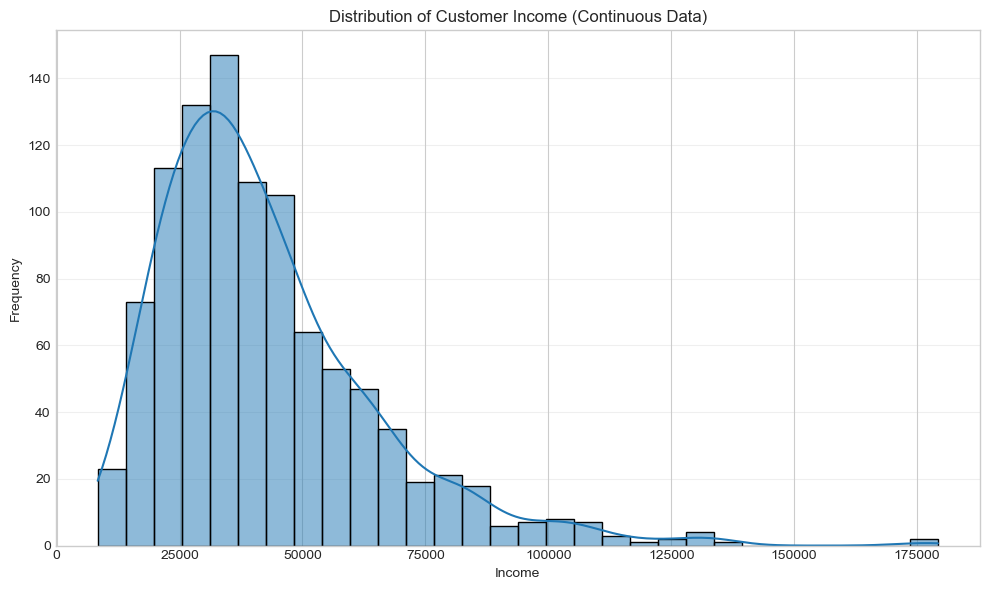

In [21]:
# Visualize discrete data
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size',hue = 'family_size', legend=False, data=customer_df, palette='Blues')
plt.title('Distribution of Family Sizes (Discrete Data)')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize continuous data
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['income'], bins=30, kde=True)
plt.title('Distribution of Customer Income (Continuous Data)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Measurement Scales

Understanding the scale of measurement is crucial for selecting appropriate statistical methods:

1. **Nominal Scale**
   - Categories with no order or ranking
   - Operations: Equality (=, ≠)
   - Example: Team names, colors, ethnicity

2. **Ordinal Scale**
   - Categories with a meaningful order, but intervals between values aren't necessarily equal
   - Operations: Equality (=, ≠), ordering (>, <)
   - Example: Education levels, survey ratings (1-5)

3. **Interval Scale**
   - Ordered categories with equal intervals, but no true zero point
   - Operations: Equality, ordering, addition/subtraction
   - Example: Temperature in Celsius, calendar dates

4. **Ratio Scale**
   - Ordered categories with equal intervals and a true zero point
   - Operations: Equality, ordering, all arithmetic operations
   - Example: Height, weight, age, income

In [23]:
# Let's create a table to visualize the scales and their properties
scales = ['Nominal', 'Ordinal', 'Interval', 'Ratio']
properties = [
    'Has distinct categories',
    'Has meaningful order',
    'Has equal intervals',
    'Has true zero point',
    'Can calculate: Mode',
    'Can calculate: Median',
    'Can calculate: Mean',
    'Can calculate: Ratios'
]

# Create a matrix of yes/no values (1/0)
scale_matrix = np.array([
    [1, 1, 1, 1],  # Has distinct categories
    [0, 1, 1, 1],  # Has meaningful order
    [0, 0, 1, 1],  # Has equal intervals
    [0, 0, 0, 1],  # Has true zero point
    [1, 1, 1, 1],  # Can calculate: Mode
    [0, 1, 1, 1],  # Can calculate: Median
    [0, 0, 1, 1],  # Can calculate: Mean
    [0, 0, 0, 1],  # Can calculate: Ratios
])

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(scale_matrix, cmap='YlGn')

# Add labels
ax.set_xticks(np.arange(len(scales)))
ax.set_yticks(np.arange(len(properties)))
ax.set_xticklabels(scales)
ax.set_yticklabels(properties)

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")

# Add annotations in each cell
for i in range(len(properties)):
    for j in range(len(scales)):
        text = "Yes" if scale_matrix[i, j] else "No"
        ax.text(j, i, text, ha="center", va="center", 
                color="black" if scale_matrix[i, j] < 0.5 else "white")

ax.set_title("Measurement Scales and Their Properties")
fig.tight_layout()
plt.show()

### Identifying Data Types in Practice

Let's analyze our customer dataset to identify the data types:

In [24]:
# Function to determine data type
def identify_data_type(series):
    """Determine the type of data in a pandas Series."""
    if series.dtype == 'object' or series.dtype.name == 'category':
        if len(series.unique()) < 10:  # Arbitrary threshold
            if series.dtype.name == 'category' and series.dtype.ordered:
                return "Categorical (Ordinal)"
            else:
                return "Categorical (Nominal)"
        else:
            return "Text"
    elif np.issubdtype(series.dtype, np.integer):
        if series.nunique() < 20 and series.min() >= 0:
            return "Numerical (Discrete)"
        else:
            return "Numerical (Continuous)"
    elif np.issubdtype(series.dtype, np.floating):
        return "Numerical (Continuous)"
    else:
        return "Other"

In [25]:
# Analyze customer dataset
data_types = {}
for column in customer_df.columns:
    data_types[column] = identify_data_type(customer_df[column])

# Create a DataFrame to display the results
data_type_df = pd.DataFrame({
    'Column': list(data_types.keys()),
    'Data Type': list(data_types.values()),
    'Sample Values': [str(customer_df[col].sample(3).tolist())[:50] + '...' for col in data_types.keys()]
})

print("Data Type Analysis for Customer Dataset:")
print(data_type_df)

Data Type Analysis for Customer Dataset:
               Column               Data Type  \
0         customer_id  Numerical (Continuous)   
1                 age  Numerical (Continuous)   
2              income  Numerical (Continuous)   
3            spending  Numerical (Continuous)   
4         family_size    Numerical (Discrete)   
5     education_level   Categorical (Nominal)   
6     customer_tenure  Numerical (Continuous)   
7  satisfaction_score    Numerical (Discrete)   
8     has_credit_card    Numerical (Discrete)   
9    num_transactions  Numerical (Continuous)   

                                       Sample Values  
0                                  [40, 481, 349]...  
1                                    [29, 28, 60]...  
2  [37271.07899815764, 83808.20500395607, 93957.2...  
3  [922.2167205583535, 1367.5596367623489, 208.66...  
4                                       [1, 1, 3]...  
5           ['Bachelor', 'High School', 'Master']...  
6                                 

### Exercises: Data Types

**Exercise 1**: For each column in the California Housing dataset, identify the data type and measurement scale.

**Exercise 2**: Create a pie chart showing the proportion of different data types in the customer dataset.

**Exercise 3**: For each data type, select an appropriate visualization method and create a visualization for one variable from the customer dataset.

## Measures of Central Tendency

Measures of central tendency describe the "center" or "typical value" of a dataset.

### Mean

The arithmetic mean (average) is the sum of all values divided by the number of values:

$$\text{Mean} = \frac{\sum_{i=1}^{n} x_i}{n}$$

In [26]:
# Calculate mean for numerical variables in customer dataset
numerical_cols = ['age', 'income', 'spending', 'family_size', 'customer_tenure', 'num_transactions']
means = {col: customer_df[col].mean() for col in numerical_cols}

print("Mean Values:")
for col, mean_val in means.items():
    print(f"{col}: {mean_val:.2f}")

Mean Values:
age: 35.10
income: 42562.57
spending: 457.30
family_size: 2.39
customer_tenure: 29.00
num_transactions: 14.95


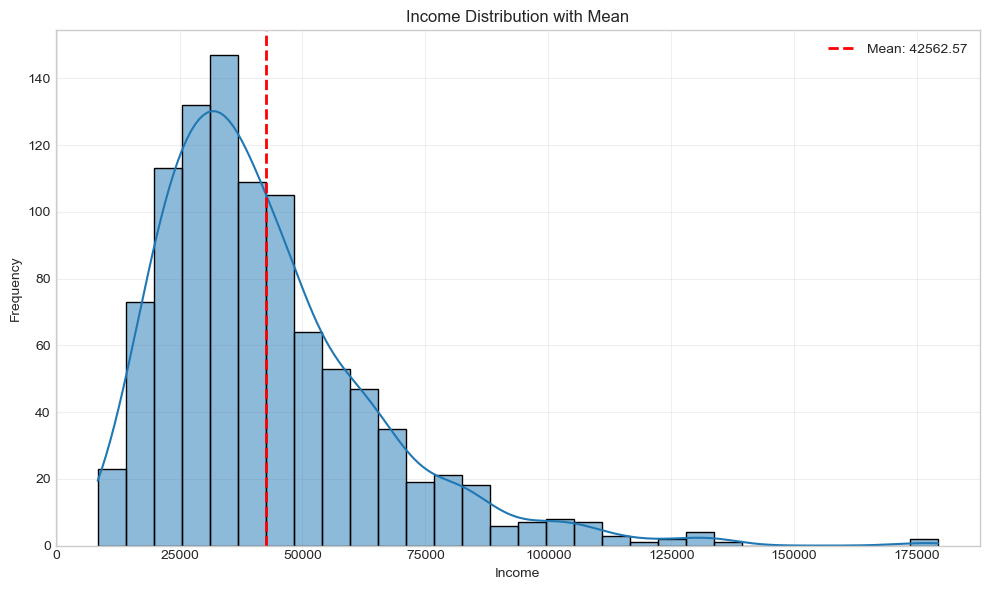

In [27]:
# Visualize mean with a distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['income'], bins=30, kde=True)
plt.axvline(x=means['income'], color='red', linestyle='--', linewidth=2, label=f'Mean: {means["income"]:.2f}')
plt.title('Income Distribution with Mean')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Median

The median is the middle value when the data is arranged in order:

- For odd number of observations: middle value
- For even number of observations: average of two middle values

In [28]:
# Calculate median for numerical variables
medians = {col: customer_df[col].median() for col in numerical_cols}

print("\nMedian Values:")
for col, median_val in medians.items():
    print(f"{col}: {median_val:.2f}")


Median Values:
age: 35.00
income: 37479.10
spending: 378.15
family_size: 2.00
customer_tenure: 27.00
num_transactions: 15.00


In [29]:
# Visualize mean and median together
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['income'], bins=30, kde=True)
plt.axvline(x=means['income'], color='red', linestyle='--', linewidth=2, label=f'Mean: {means["income"]:.2f}')
plt.axvline(x=medians['income'], color='green', linestyle='--', linewidth=2, label=f'Median: {medians["income"]:.2f}')
plt.title('Income Distribution with Mean and Median')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Mode

The mode is the most frequently occurring value in the dataset:

In [31]:
# Calculate mode for numerical and categorical variables
modes = {}
for col in numerical_cols + ['education_level', 'satisfaction_score']:
    mode_val = customer_df[col].mode()[0]  # Mode can have multiple values, take the first
    modes[col] = mode_val

print("\nMode Values:")
for col, mode_val in modes.items():
    print(f"{col}: {mode_val}")


Mode Values:
age: 18
income: 8348.237207372018
spending: 74.00187806524109
family_size: 2
customer_tenure: 29
num_transactions: 14
education_level: High School
satisfaction_score: 4


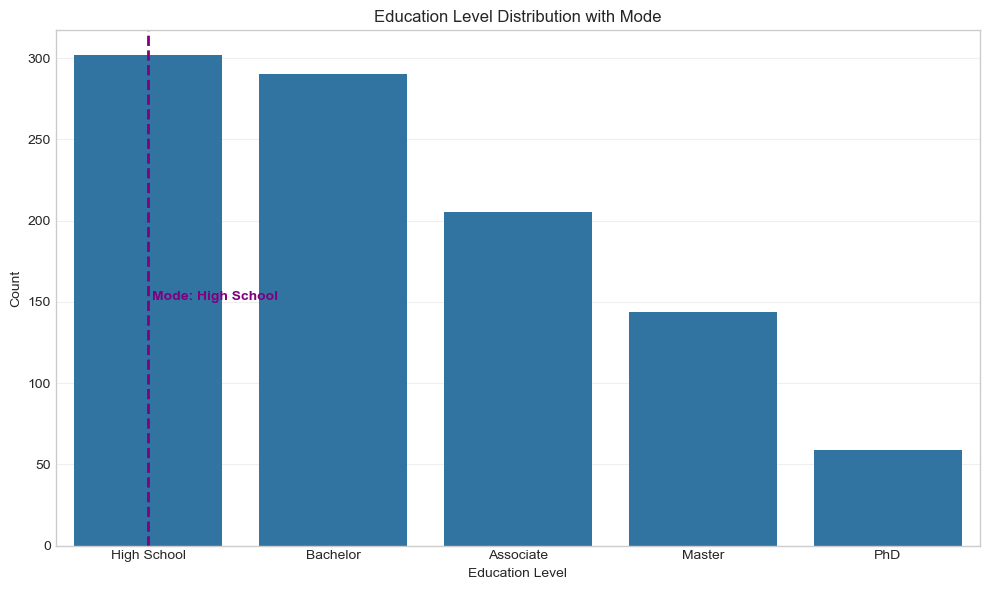

In [32]:
# Visualize mode for a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='education_level', data=customer_df, order=customer_df['education_level'].value_counts().index)
plt.axvline(x=list(customer_df['education_level'].value_counts().index).index(modes['education_level']), 
           color='purple', linestyle='--', linewidth=2)
plt.title('Education Level Distribution with Mode')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.annotate(f'Mode: {modes["education_level"]}', 
             xy=(list(customer_df['education_level'].value_counts().index).index(modes['education_level']), 
                 customer_df['education_level'].value_counts().max()/2),
             xytext=(3, 0), textcoords='offset points',
             color='purple', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### When to Use Each Measure

Each measure of central tendency has its strengths and appropriate applications:

| Measure | Best For | Advantages | Disadvantages |
|---------|----------|------------|---------------|
| Mean | Continuous data with symmetric distribution | Uses all data points; Algebraic properties | Sensitive to outliers |
| Median | Skewed distributions; Ordinal data | Robust to outliers; Works with ranked data | Ignores specific values | 
| Mode | Categorical data; Discrete data | Works with any data type; Shows most common value | Can be multiple modes; Unstable in small samples |

In [33]:
# Create data with different distributions to compare measures
np.random.seed(42)
symmetric_data = np.random.normal(100, 15, 1000)  # Symmetric
skewed_data = np.random.lognormal(4.5, 0.5, 1000)  # Right skewed
bimodal_data = np.concatenate([np.random.normal(80, 10, 500), np.random.normal(120, 10, 500)])  # Bimodal

# Calculate central tendency measures
dist_data = {
    'Symmetric': symmetric_data,
    'Right-Skewed': skewed_data,
    'Bimodal': bimodal_data
}

results = {}
for name, data in dist_data.items():
    results[name] = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Mode': stats.mode(data, keepdims=True)[0][0]  # Returns mode and count
    }

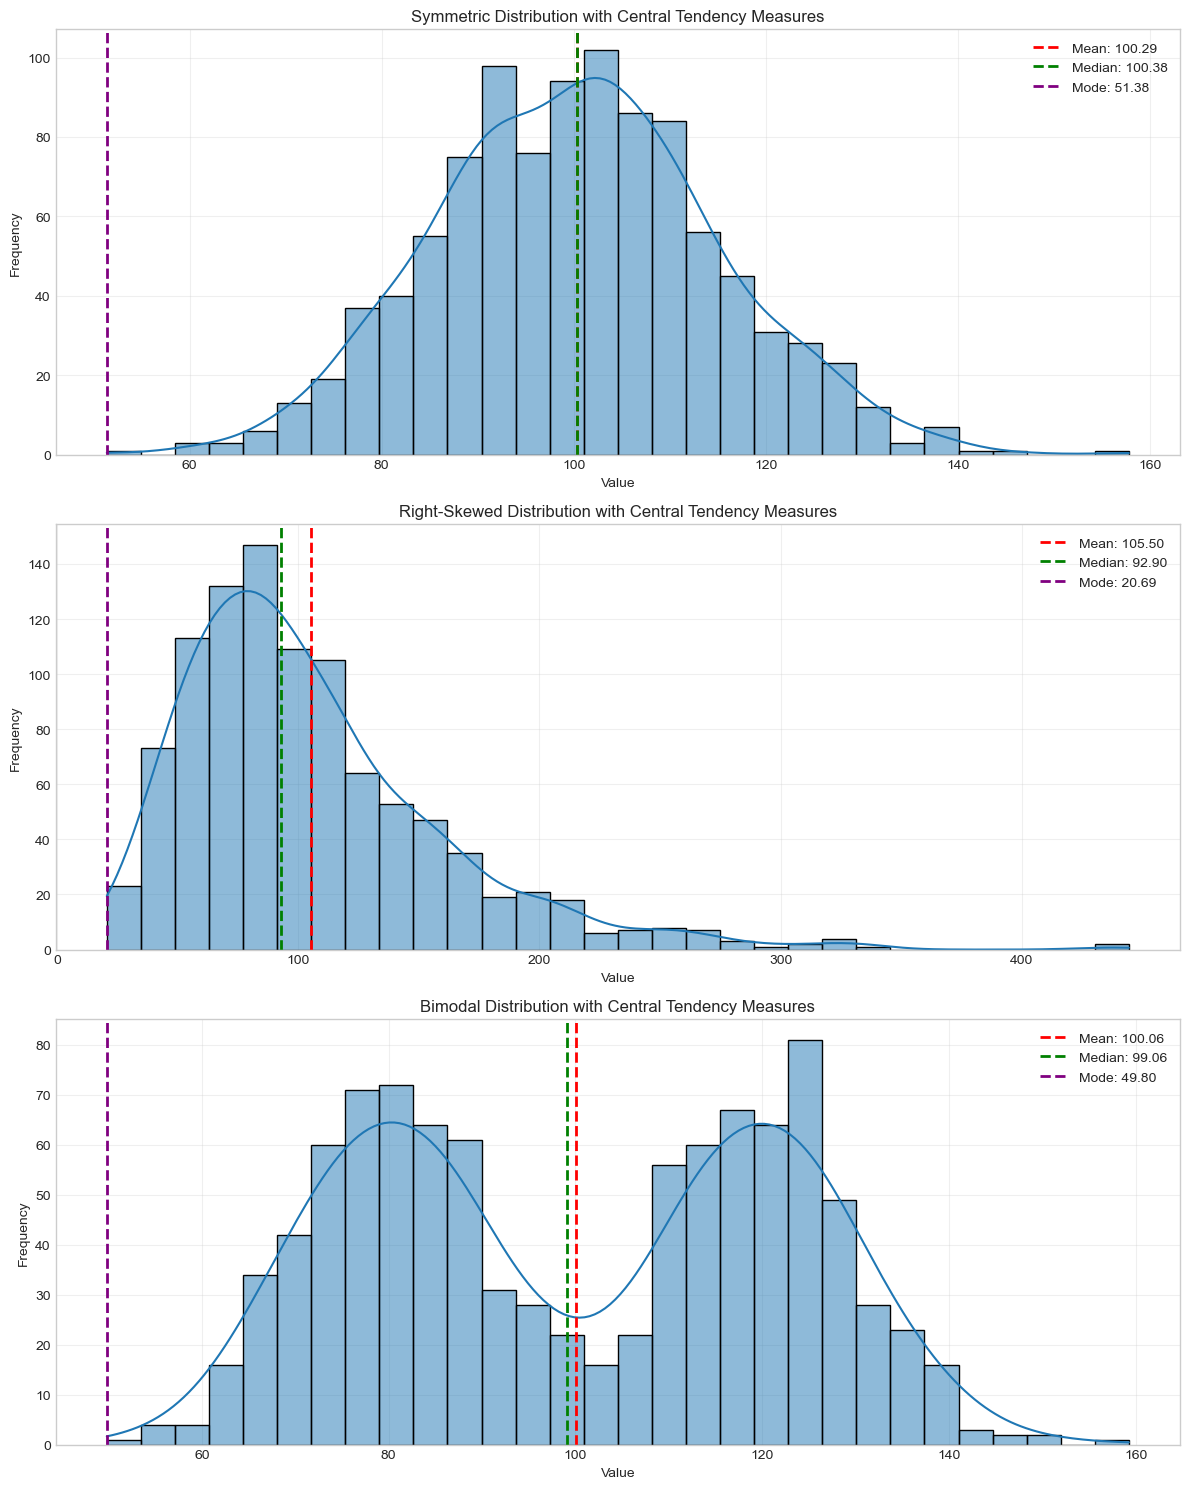

In [34]:
# Visualize the different distributions with their central tendency measures
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

for i, (name, data) in enumerate(dist_data.items()):
    sns.histplot(data, bins=30, kde=True, ax=axes[i])
    axes[i].axvline(x=results[name]['Mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: {results[name]["Mean"]:.2f}')
    axes[i].axvline(x=results[name]['Median'], color='green', linestyle='--', linewidth=2, label=f'Median: {results[name]["Median"]:.2f}')
    axes[i].axvline(x=results[name]['Mode'], color='purple', linestyle='--', linewidth=2, label=f'Mode: {results[name]["Mode"]:.2f}')
    axes[i].set_title(f'{name} Distribution with Central Tendency Measures')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Impact of Outliers

Outliers can significantly affect measures of central tendency, particularly the mean:

In [36]:
# Create a dataset with outliers
np.random.seed(42)
regular_data = np.random.normal(100, 15, 100)
data_with_outliers = np.append(regular_data, [250, 260, 275])  # Add three outliers

# Calculate measures with and without outliers
stats_regular = {
    'Mean': np.mean(regular_data),
    'Median': np.median(regular_data),
    'Mode': stats.mode(regular_data, keepdims=True)[0][0]
}

stats_with_outliers = {
    'Mean': np.mean(data_with_outliers),
    'Median': np.median(data_with_outliers),
    'Mode': stats.mode(data_with_outliers, keepdims=True)[0][0]
}

# Compare the results
comparison = pd.DataFrame({
    'Without Outliers': stats_regular,
    'With Outliers': stats_with_outliers,
    'Percent Change': {k: (stats_with_outliers[k] - v) / v * 100 for k, v in stats_regular.items()}
})

print("Impact of Outliers on Central Tendency Measures:")
comparison.round(2)

Impact of Outliers on Central Tendency Measures:


Without Outliers  With Outliers  Percent Change
Mean               98.44         103.20            4.83
Median             98.10          98.92            0.84
Mode               60.70          60.70            0.00

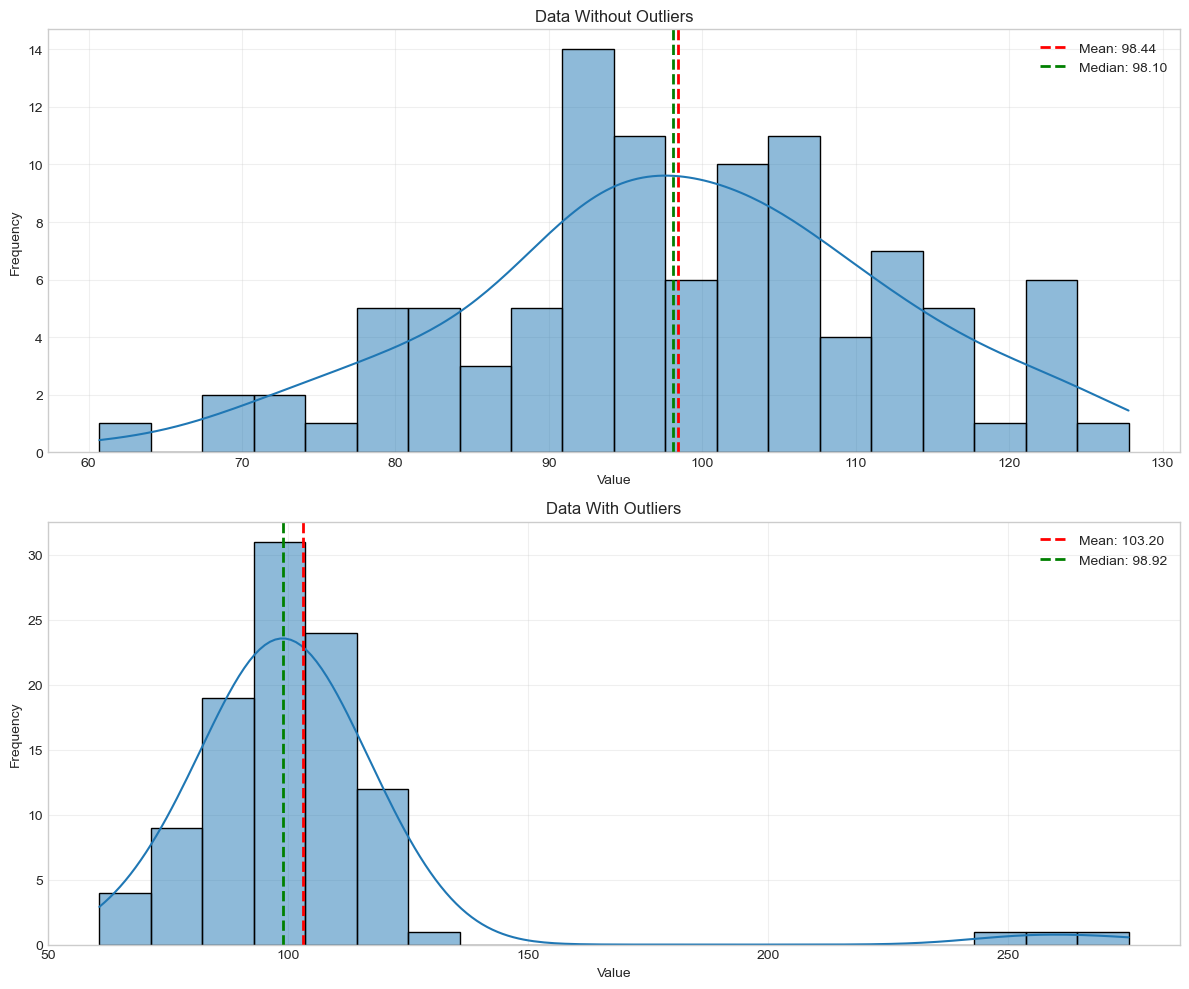

In [37]:
# Visualize the data with and without outliers
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Data without outliers
sns.histplot(regular_data, bins=20, kde=True, ax=axes[0])
axes[0].axvline(x=stats_regular['Mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: {stats_regular["Mean"]:.2f}')
axes[0].axvline(x=stats_regular['Median'], color='green', linestyle='--', linewidth=2, label=f'Median: {stats_regular["Median"]:.2f}')
axes[0].set_title('Data Without Outliers')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Data with outliers
sns.histplot(data_with_outliers, bins=20, kde=True, ax=axes[1])
axes[1].axvline(x=stats_with_outliers['Mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: {stats_with_outliers["Mean"]:.2f}')
axes[1].axvline(x=stats_with_outliers['Median'], color='green', linestyle='--', linewidth=2, label=f'Median: {stats_with_outliers["Median"]:.2f}')
axes[1].set_title('Data With Outliers')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Exercises: Central Tendency

**Exercise 1**: Calculate the mean, median, and mode for the 'MedHouseVal' column in the California Housing dataset. Create a visualization showing all three measures on the distribution of house values.

**Exercise 2**: For each numerical column in the customer dataset, determine which measure of central tendency (mean, median, or mode) is most appropriate, and explain why.

**Exercise 3**: Create a new dataset by introducing three extreme outliers to the customer income data. Calculate the percent change in mean, median, and mode, and visualize the results.

## Measures of Dispersion

While central tendency measures describe the typical value, dispersion measures describe how spread out the data is.

### Range

The range is the difference between the maximum and minimum values:

$$\text{Range} = \max(x) - \min(x)$$

In [38]:
# Calculate range for numerical variables
ranges = {col: customer_df[col].max() - customer_df[col].min() for col in numerical_cols}

print("Ranges:")
for col, range_val in ranges.items():
    print(f"{col}: {range_val:.2f}")

Ranges:
age: 62.00
income: 170904.81
spending: 2539.90
family_size: 5.00
customer_tenure: 56.00
num_transactions: 25.00


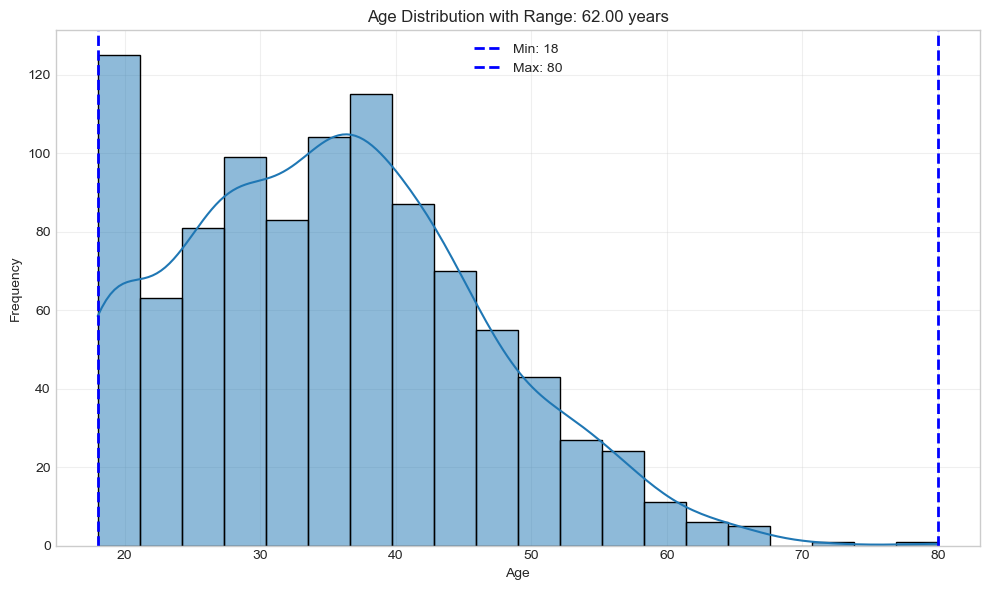

In [39]:
# Visualize range for age
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['age'], bins=20, kde=True)
plt.axvline(x=customer_df['age'].min(), color='blue', linestyle='--', linewidth=2, label=f'Min: {customer_df["age"].min()}')
plt.axvline(x=customer_df['age'].max(), color='blue', linestyle='--', linewidth=2, label=f'Max: {customer_df["age"].max()}')
plt.title(f'Age Distribution with Range: {ranges["age"]:.2f} years')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interquartile Range (IQR)

The interquartile range is the difference between the third quartile (75th percentile) and the first quartile (25th percentile):

$$\text{IQR} = Q_3 - Q_1$$

In [42]:
# Calculate IQR for numerical variables
iqrs = {}
for col in numerical_cols:
    q1 = customer_df[col].quantile(0.25)
    q3 = customer_df[col].quantile(0.75)
    iqrs[col] = q3 - q1

print("\nInterquartile Ranges (IQRs):")
for col, iqr_val in iqrs.items():
    print(f"{col}: {iqr_val:.2f}")


Interquartile Ranges (IQRs):
age: 15.00
income: 25464.43
spending: 306.38
family_size: 2.00
customer_tenure: 17.00
num_transactions: 5.00


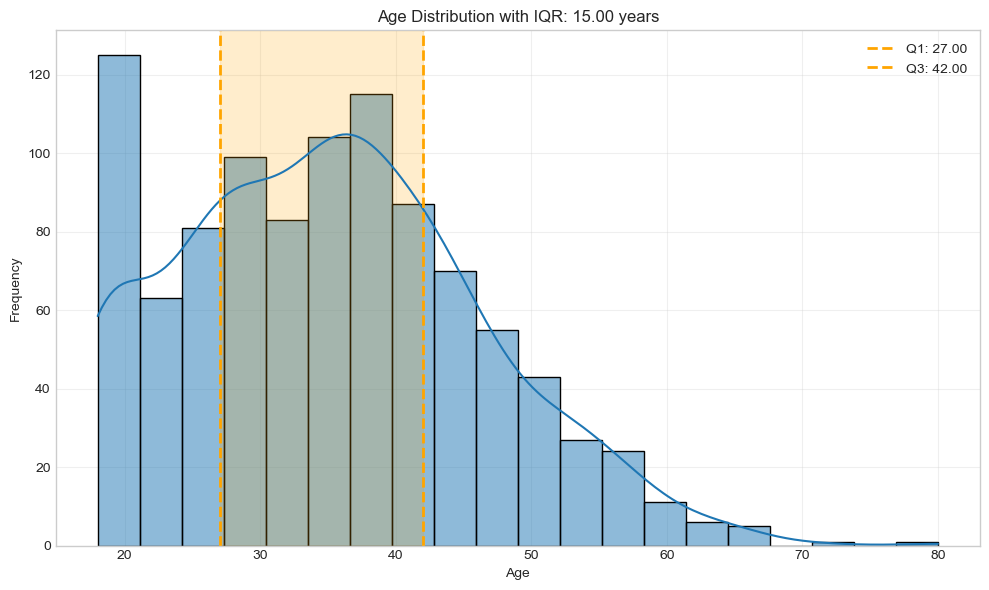

In [41]:
# Visualize IQR for age
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['age'], bins=20, kde=True)
q1 = customer_df['age'].quantile(0.25)
q3 = customer_df['age'].quantile(0.75)
plt.axvline(x=q1, color='orange', linestyle='--', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(x=q3, color='orange', linestyle='--', linewidth=2, label=f'Q3: {q3:.2f}')
plt.axvspan(q1, q3, alpha=0.2, color='orange')
plt.title(f'Age Distribution with IQR: {iqrs["age"]:.2f} years')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
# Create a box plot to visualize IQR and other statistics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=customer_df['age'])
plt.title('Age Distribution Box Plot')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(y=customer_df['income'])
plt.title('Income Distribution Box Plot')
plt.ylabel('Income')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The IQR is useful for:
- Understanding the spread of the middle 50% of data
- Identifying outliers (values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR)
- Creating box plots
- Comparing distributions when the scale or units are different

### Variance

Variance measures the average squared deviation from the mean:

$$\text{Variance} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}$$

For sample data (with Bessel's correction):

$$\text{Sample Variance} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$$

In [45]:
# Calculate variance for numerical variables
variances = {col: customer_df[col].var() for col in numerical_cols}

print("\nVariances:")
for col, var_val in variances.items():
    print(f"{col}: {var_val:.2f}")


Variances:
age: 122.84
income: 498025867.80
spending: 95511.41
family_size: 1.77
customer_tenure: 156.90
num_transactions: 14.36


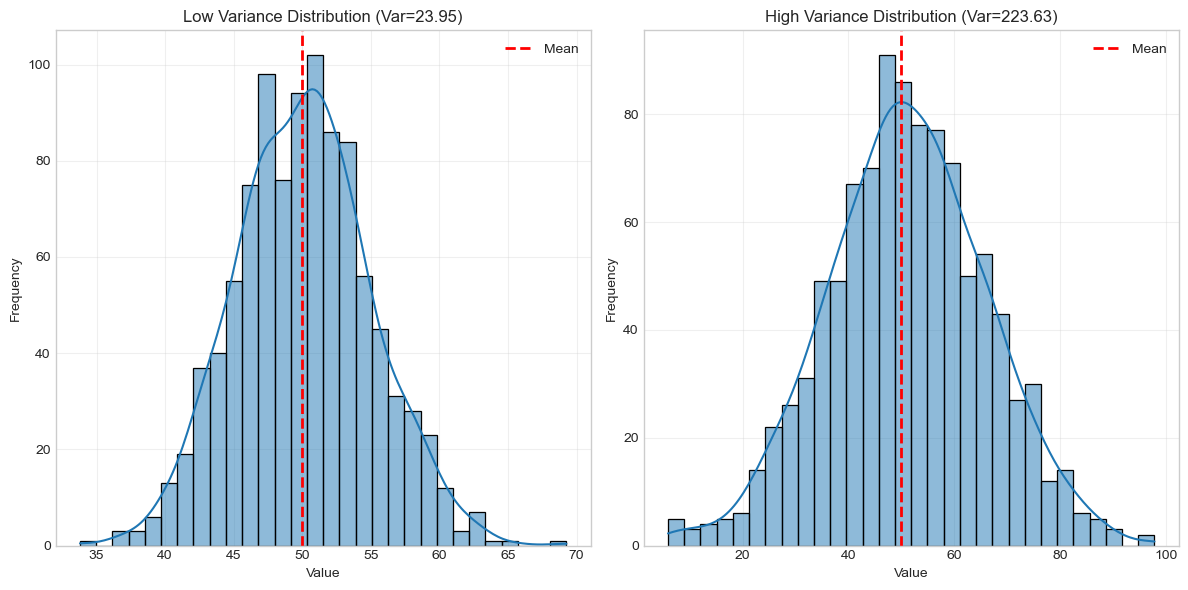

In [46]:
# Visualize the concept of variance
np.random.seed(42)
# Create two distributions with different variances
low_var = np.random.normal(50, 5, 1000)  # Mean=50, SD=5 (Variance=25)
high_var = np.random.normal(50, 15, 1000)  # Mean=50, SD=15 (Variance=225)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(low_var, bins=30, kde=True)
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Mean')
plt.title(f'Low Variance Distribution (Var={np.var(low_var):.2f})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(high_var, bins=30, kde=True)
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Mean')
plt.title(f'High Variance Distribution (Var={np.var(high_var):.2f})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Standard Deviation

Standard deviation is the square root of the variance, giving us a measure in the same units as the original data:

$$\text{Standard Deviation} = \sqrt{\text{Variance}} = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}$$

For sample data:

$$\text{Sample Standard Deviation} = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$$

In [47]:
# Calculate standard deviation for numerical variables
stds = {col: customer_df[col].std() for col in numerical_cols}

print("\nStandard Deviations:")
for col, std_val in stds.items():
    print(f"{col}: {std_val:.2f}")


Standard Deviations:
age: 11.08
income: 22316.49
spending: 309.05
family_size: 1.33
customer_tenure: 12.53
num_transactions: 3.79


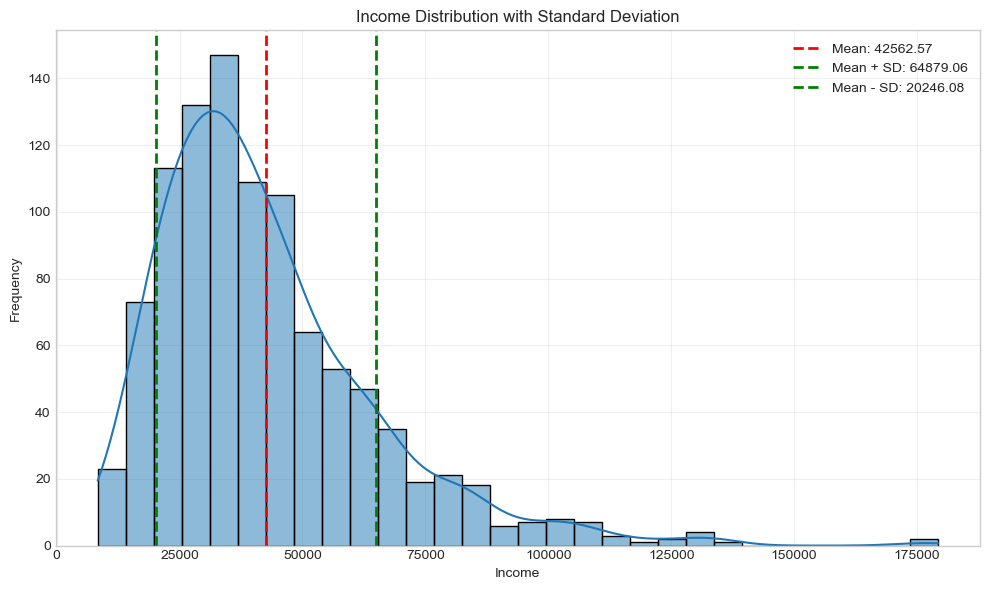

In [48]:
# Visualize standard deviation with income
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['income'], bins=30, kde=True)
plt.axvline(x=means['income'], color='red', linestyle='--', linewidth=2, label=f'Mean: {means["income"]:.2f}')
plt.axvline(x=means['income'] + stds['income'], color='green', linestyle='--', linewidth=2, 
           label=f'Mean + SD: {means["income"] + stds["income"]:.2f}')
plt.axvline(x=means['income'] - stds['income'], color='green', linestyle='--', linewidth=2, 
           label=f'Mean - SD: {means["income"] - stds["income"]:.2f}')
plt.title('Income Distribution with Standard Deviation')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [49]:
# Visualize the empirical rule for normal distributions
plt.figure(figsize=(12, 6))
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.fill_between(x, y, where=(x >= -1) & (x <= 1), color='red', alpha=0.3, label='68.3% (±1σ)')
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='green', alpha=0.2, label='95.4% (±2σ)')
plt.fill_between(x, y, where=(x >= -3) & (x <= 3), color='blue', alpha=0.1, label='99.7% (±3σ)')

plt.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=-1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=-2, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=2, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=-3, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=3, color='gray', linestyle='--', alpha=0.5)

plt.title('The Empirical Rule (68-95-99.7 Rule) for Normal Distributions')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The standard deviation is useful for:
- Understanding the typical distance from the mean
- Identifying unusual observations
- Standardizing data (z-scores)
- Working with the empirical rule in normal distributions

### Coefficient of Variation

The coefficient of variation (CV) is the ratio of the standard deviation to the mean:

$$\text{CV} = \frac{\sigma}{\mu} \times 100\%$$

It's particularly useful for comparing the relative variability of distributions with different units or magnitudes.

In [50]:
# Calculate coefficient of variation for numerical variables
cvs = {col: (stds[col] / means[col] * 100) for col in numerical_cols}

print("\nCoefficients of Variation (%):")
for col, cv_val in cvs.items():
    print(f"{col}: {cv_val:.2f}%")


Coefficients of Variation (%):
age: 31.58%
income: 52.43%
spending: 67.58%
family_size: 55.68%
customer_tenure: 43.19%
num_transactions: 25.35%


In [51]:
# Visualize CV for different variables
plt.figure(figsize=(12, 6))
plt.bar(cvs.keys(), cvs.values(), color='skyblue')
plt.title('Coefficient of Variation for Numerical Variables')
plt.xlabel('Variable')
plt.ylabel('Coefficient of Variation (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, (key, value) in enumerate(cvs.items()):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center')

plt.tight_layout()
plt.show()

### Exercises: Dispersion

**Exercise 1**: Calculate and compare the range, IQR, variance, and standard deviation for each feature in the California Housing dataset. Create visualizations to illustrate these dispersion measures.

**Exercise 2**: Generate three datasets with the same mean but different levels of dispersion. Calculate all dispersion measures for each dataset and visualize the differences.

**Exercise 3**: Find the coefficient of variation for each numerical column in the customer dataset. Identify which variables show the most and least relative variability, and explain what this means for your analysis.

## Measures of Shape

Beyond central tendency and dispersion, the shape of a distribution provides important insights about the data.

### Skewness

Skewness measures the asymmetry of a distribution:

- **Positive skewness (right-skewed)**: The distribution has a long right tail (mean > median)
- **Negative skewness (left-skewed)**: The distribution has a long left tail (mean < median)
- **Zero skewness (symmetric)**: The distribution is symmetric (mean ≈ median)

In [53]:
# Calculate skewness for numerical variables
skewness = {col: customer_df[col].skew() for col in numerical_cols}

print("Skewness Values:")
for col, skew_val in skewness.items():
    print(f"{col}: {skew_val:.2f}")

Skewness Values:
age: 0.40
income: 1.58
spending: 2.07
family_size: 0.90
customer_tenure: 0.61
num_transactions: 0.40


In [54]:
# Interpret skewness
def interpret_skewness(skew):
    if skew < -1:
        return "Highly Negatively Skewed"
    elif skew < -0.5:
        return "Moderately Negatively Skewed"
    elif skew < 0:
        return "Approximately Symmetric (Slight Negative Skew)"
    elif skew < 0.5:
        return "Approximately Symmetric (Slight Positive Skew)"
    elif skew < 1:
        return "Moderately Positively Skewed"
    else:
        return "Highly Positively Skewed"

# Add interpretation
skewness_interpretation = {col: interpret_skewness(skew) for col, skew in skewness.items()}

for col, interp in skewness_interpretation.items():
    print(f"{col}: {interp}")

age: Approximately Symmetric (Slight Positive Skew)
income: Highly Positively Skewed
spending: Highly Positively Skewed
family_size: Moderately Positively Skewed
customer_tenure: Moderately Positively Skewed
num_transactions: Approximately Symmetric (Slight Positive Skew)


In [58]:
# Create examples of different skewness
np.random.seed(42)
# Symmetric distribution (Normal)
symmetric = np.random.normal(0, 1, 1000)
# Right-skewed distribution (Lognormal)
right_skewed = np.random.lognormal(0, 0.7, 1000)
# Left-skewed distribution (Negative of lognormal)
left_skewed = -np.random.lognormal(0, 0.7, 1000)

# Calculate skewness for each distribution
skew_values = {
    'Symmetric': stats.skew(symmetric),
    'Right-Skewed': stats.skew(right_skewed),
    'Left-Skewed': stats.skew(left_skewed)
}

In [59]:
# Visualize skewness examples
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Symmetric
sns.histplot(symmetric, bins=30, kde=True, ax=axes[0])
axes[0].axvline(x=np.mean(symmetric), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(symmetric):.2f}')
axes[0].axvline(x=np.median(symmetric), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(symmetric):.2f}')
axes[0].set_title(f'Symmetric Distribution (Skewness: {skew_values["Symmetric"]:.2f})')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right-skewed
sns.histplot(right_skewed, bins=30, kde=True, ax=axes[1])
axes[1].axvline(x=np.mean(right_skewed), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(right_skewed):.2f}')
axes[1].axvline(x=np.median(right_skewed), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(right_skewed):.2f}')
axes[1].set_title(f'Right-Skewed Distribution (Skewness: {skew_values["Right-Skewed"]:.2f})')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Left-skewed
sns.histplot(left_skewed, bins=30, kde=True, ax=axes[2])
axes[2].axvline(x=np.mean(left_skewed), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(left_skewed):.2f}')
axes[2].axvline(x=np.median(left_skewed), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(left_skewed):.2f}')
axes[2].set_title(f'Left-Skewed Distribution (Skewness: {skew_values["Left-Skewed"]:.2f})')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

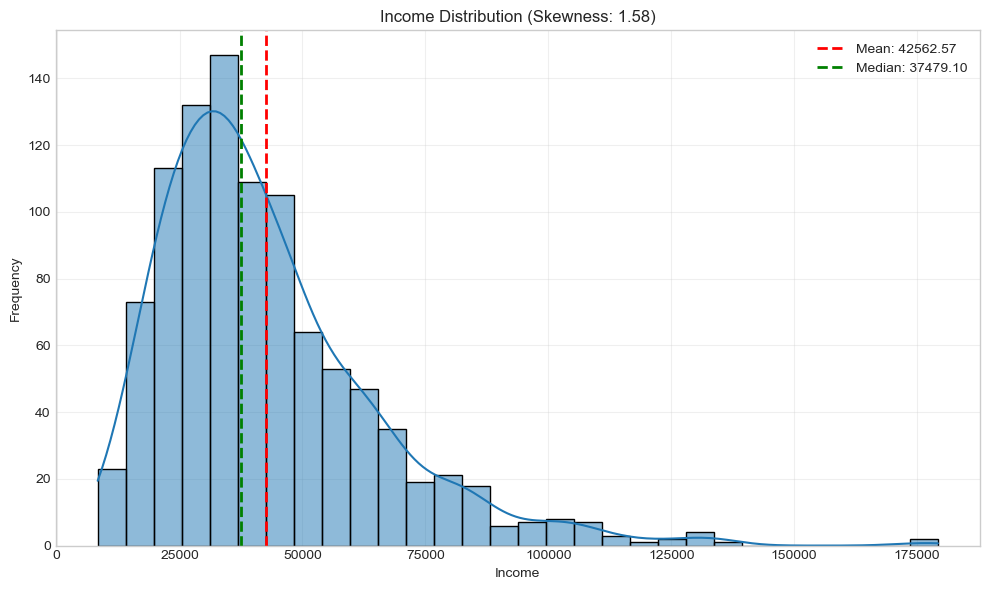

In [60]:
# Visualize a real example from our dataset: Income (right-skewed)
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['income'], bins=30, kde=True)
plt.axvline(x=customer_df['income'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {customer_df["income"].mean():.2f}')
plt.axvline(x=customer_df['income'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {customer_df["income"].median():.2f}')
plt.title(f'Income Distribution (Skewness: {customer_df["income"].skew():.2f})')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Kurtosis

Kurtosis measures the "tailedness" or the concentration of observations in the tails of a distribution:

- **Mesokurtic (kurtosis ≈ 3)**: Normal distribution (excess kurtosis ≈ 0)
- **Leptokurtic (kurtosis > 3)**: Heavy tails, higher peak (excess kurtosis > 0)
- **Platykurtic (kurtosis < 3)**: Light tails, flatter peak (excess kurtosis < 0)

Note: SciPy and pandas return "excess kurtosis" (kurtosis - 3), so a normal distribution has excess kurtosis of 0.

In [61]:
# Calculate kurtosis for numerical variables
kurtosis = {col: customer_df[col].kurt() for col in numerical_cols}

print("\nKurtosis Values (Excess Kurtosis):")
for col, kurt_val in kurtosis.items():
    print(f"{col}: {kurt_val:.2f}")


Kurtosis Values (Excess Kurtosis):
age: -0.20
income: 4.03
spending: 6.29
family_size: 0.10
customer_tenure: -0.18
num_transactions: 0.20


In [62]:
# Interpret kurtosis
def interpret_kurtosis(kurt):
    if kurt < -1:
        return "Very Platykurtic (Much flatter than normal)"
    elif kurt < -0.5:
        return "Moderately Platykurtic (Flatter than normal)"
    elif kurt < 0.5:
        return "Mesokurtic (Similar to normal distribution)"
    elif kurt < 1:
        return "Moderately Leptokurtic (More peaked than normal)"
    else:
        return "Very Leptokurtic (Much more peaked than normal)"

# Add interpretation
kurtosis_interpretation = {col: interpret_kurtosis(kurt) for col, kurt in kurtosis.items()}

for col, interp in kurtosis_interpretation.items():
    print(f"{col}: {interp}")

age: Mesokurtic (Similar to normal distribution)
income: Very Leptokurtic (Much more peaked than normal)
spending: Very Leptokurtic (Much more peaked than normal)
family_size: Mesokurtic (Similar to normal distribution)
customer_tenure: Mesokurtic (Similar to normal distribution)
num_transactions: Mesokurtic (Similar to normal distribution)


In [63]:
# Create examples of different kurtosis
np.random.seed(42)
# Mesokurtic (Normal)
mesokurtic = np.random.normal(0, 1, 1000)
# Leptokurtic (t-distribution with 5 degrees of freedom)
leptokurtic = np.random.standard_t(5, 1000)
# Platykurtic (Uniform)
platykurtic = np.random.uniform(-3, 3, 1000)

# Calculate kurtosis for each distribution
kurt_values = {
    'Mesokurtic': stats.kurtosis(mesokurtic),
    'Leptokurtic': stats.kurtosis(leptokurtic),
    'Platykurtic': stats.kurtosis(platykurtic)
}

# Visualize kurtosis examples
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Mesokurtic
sns.histplot(mesokurtic, bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'Mesokurtic Distribution (Excess Kurtosis: {kurt_values["Mesokurtic"]:.2f})')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Leptokurtic
sns.histplot(leptokurtic, bins=30, kde=True, ax=axes[1])
axes[1].set_title(f'Leptokurtic Distribution (Excess Kurtosis: {kurt_values["Leptokurtic"]:.2f})')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Platykurtic
sns.histplot(platykurtic, bins=30, kde=True, ax=axes[2])
axes[2].set_title(f'Platykurtic Distribution (Excess Kurtosis: {kurt_values["Platykurtic"]:.2f})')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Modality

Modality refers to the number of "peaks" or modes in a distribution:

- **Unimodal**: One peak
- **Bimodal**: Two peaks
- **Multimodal**: Multiple peaks

In [64]:
# Create examples of different modalities
np.random.seed(42)
# Unimodal
unimodal = np.random.normal(0, 1, 1000)
# Bimodal
bimodal = np.concatenate([np.random.normal(-2, 0.5, 500), np.random.normal(2, 0.5, 500)])
# Multimodal
multimodal = np.concatenate([np.random.normal(-4, 0.5, 300), 
                             np.random.normal(0, 0.5, 400),
                             np.random.normal(4, 0.5, 300)])

# Visualize modality examples
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Unimodal
sns.histplot(unimodal, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Unimodal Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Bimodal
sns.histplot(bimodal, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Bimodal Distribution')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Multimodal
sns.histplot(multimodal, bins=30, kde=True, ax=axes[2])
axes[2].set_title('Multimodal Distribution')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Visualizing Distribution Shapes

Let's put everything together to visualize the shape of real distributions from our datasets:

In [65]:
# Create a function to plot distribution with shape metrics
def plot_distribution_with_shape(data, title, bins=30):
    plt.figure(figsize=(12, 8))
    
    # Calculate shape metrics
    mean_val = np.mean(data)
    median_val = np.median(data)
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data)
    
    # Create histogram with KDE
    sns.histplot(data, bins=bins, kde=True)
    
    # Add mean and median lines
    plt.axvline(x=mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(x=median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Add shape metrics to title
    plt.title(f'{title}\nSkewness: {skew_val:.2f}, Excess Kurtosis: {kurt_val:.2f}')
    
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example distributions from our datasets

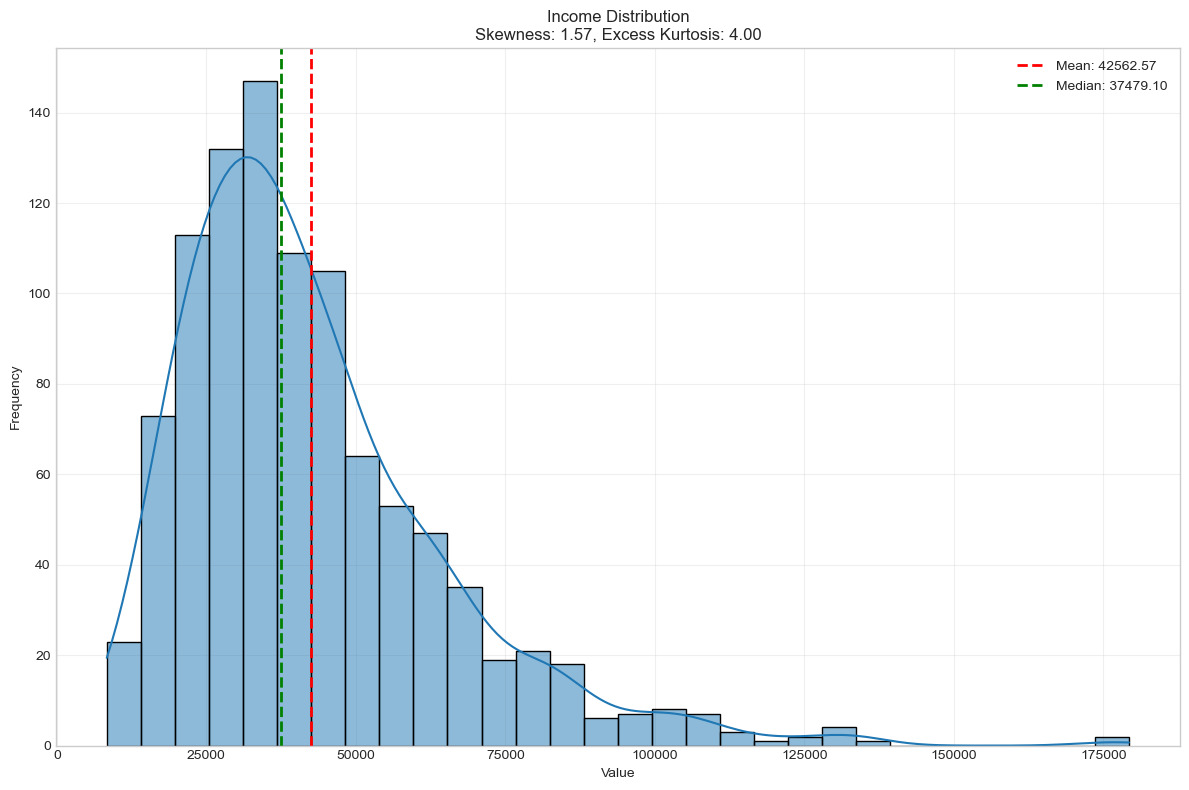

In [67]:
# 1. Income (right-skewed)
plot_distribution_with_shape(customer_df['income'], 'Income Distribution')

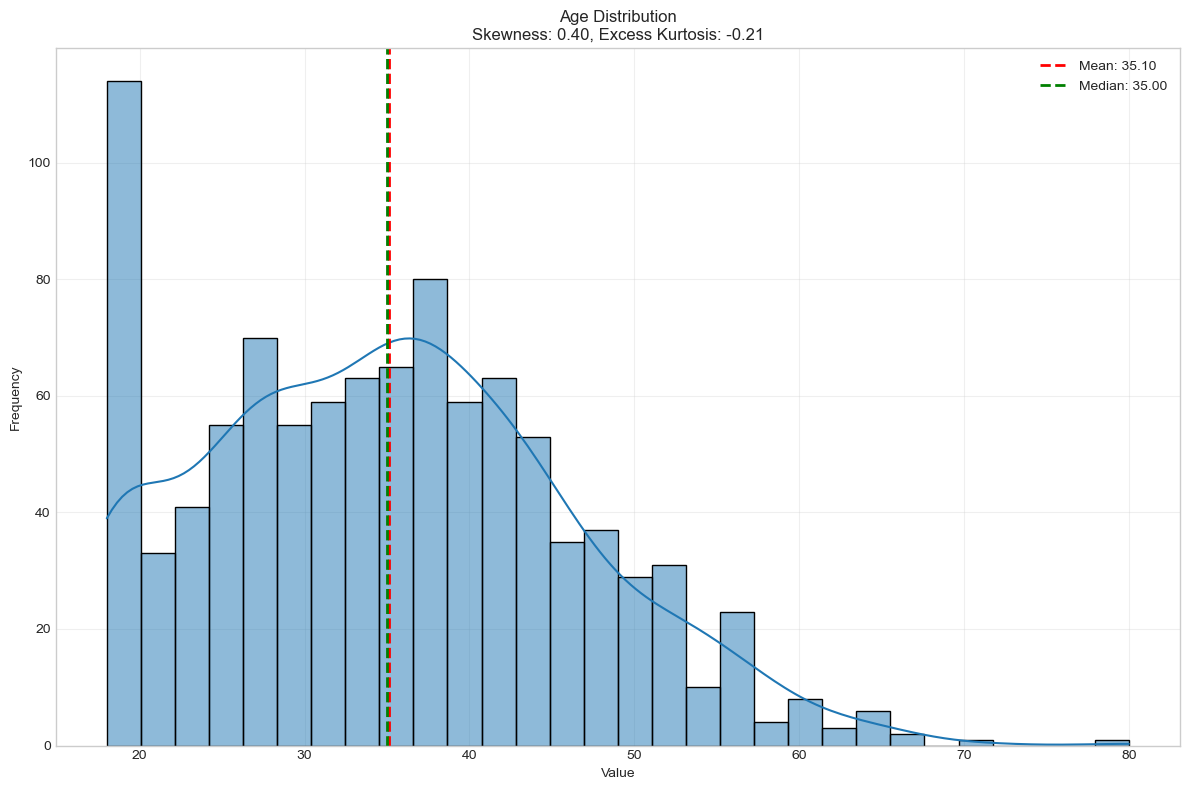

In [68]:
# 2. Age (more symmetric)
plot_distribution_with_shape(customer_df['age'], 'Age Distribution')

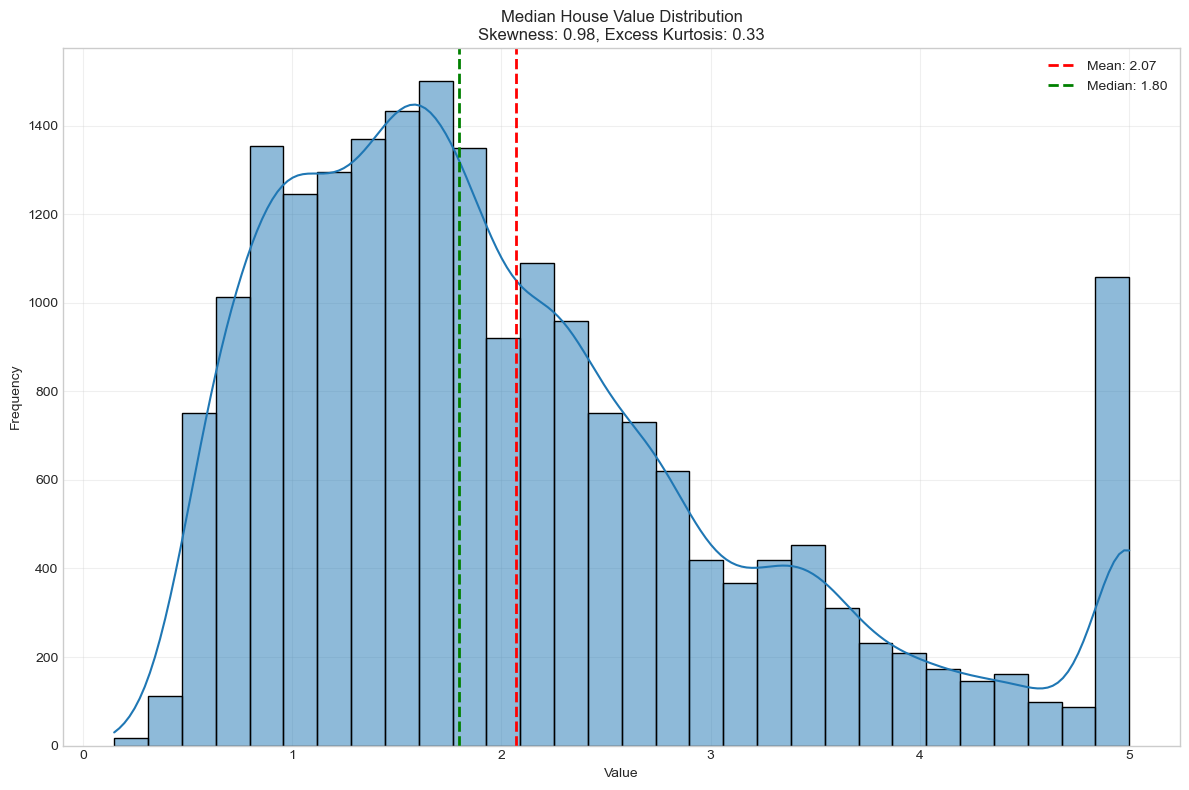

In [69]:
# 3. California Housing MedHouseVal
plot_distribution_with_shape(california_df['MedHouseVal'], 'Median House Value Distribution')

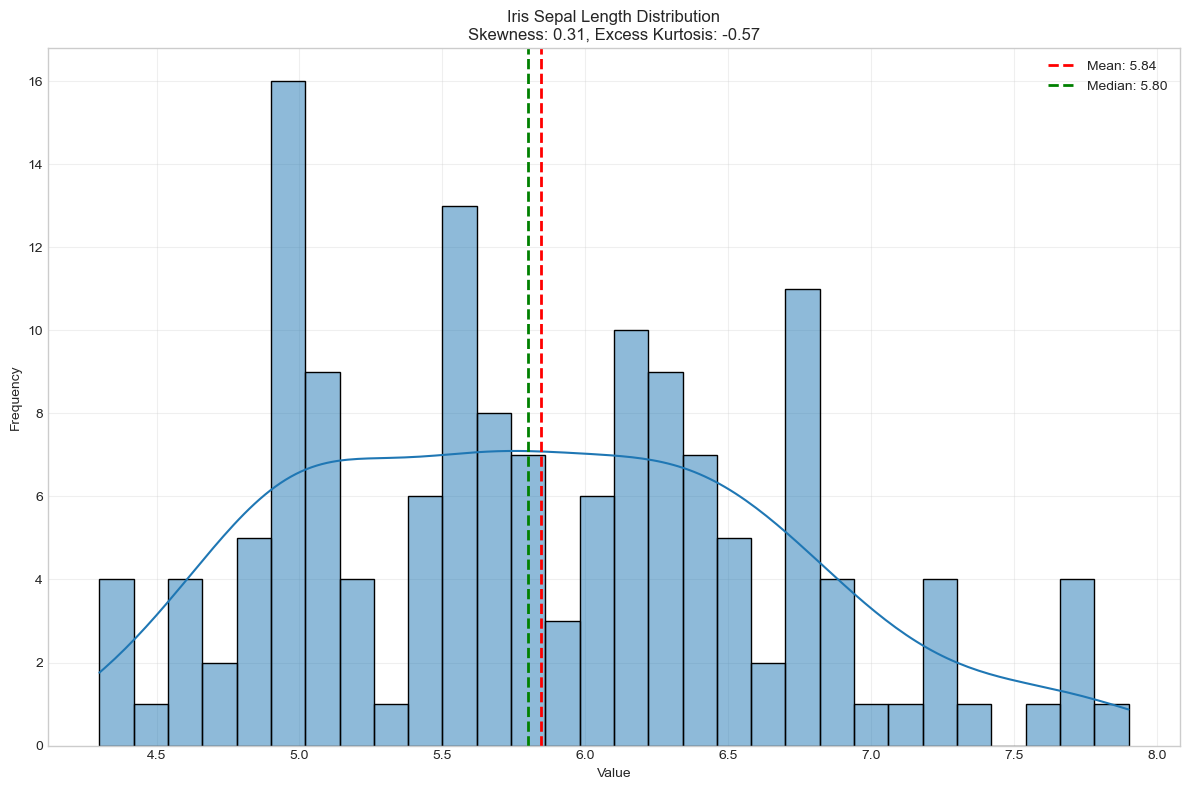

In [70]:
# 4. Iris Sepal Length (potentially multimodal due to species differences)
plot_distribution_with_shape(iris_df['sepal length (cm)'], 'Iris Sepal Length Distribution')

### Exercises: Shape

**Exercise 1**: For each numerical column in the California Housing dataset, calculate skewness and kurtosis. Create a bar chart comparing these shape metrics across columns.

**Exercise 2**: Generate and visualize three distributions with the same mean and standard deviation but different shapes (different skewness and kurtosis).

**Exercise 3**: For the customer age data, investigate if there might be multimodality by creating a kernel density plot. If there appears to be multiple modes, try to explain what might cause this in a real-world context.

## Practical Exercise: Statistical Analysis of Real Data

Let's apply all the statistical concepts we've learned to a comprehensive analysis of the California Housing dataset.

### Descriptive Statistics

First, let's calculate and analyze the basic descriptive statistics:

In [75]:
# Generate comprehensive descriptive statistics
california_stats = california_df.describe()
print("California Housing Dataset - Descriptive Statistics:")
california_stats

California Housing Dataset - Descriptive Statistics:


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [76]:
# Add skewness and kurtosis
california_stats.loc['skewness'] = california_df.skew()
california_stats.loc['kurtosis'] = california_df.kurt()

print("\nExtended Descriptive Statistics (including shape metrics):")
california_stats


Extended Descriptive Statistics (including shape metrics):


MedInc      HouseAge      AveRooms     AveBedrms  \
count     20640.000000  20640.000000  20640.000000  20640.000000   
mean          3.870671     28.639486      5.429000      1.096675   
std           1.899822     12.585558      2.474173      0.473911   
min           0.499900      1.000000      0.846154      0.333333   
25%           2.563400     18.000000      4.440716      1.006079   
50%           3.534800     29.000000      5.229129      1.048780   
75%           4.743250     37.000000      6.052381      1.099526   
max          15.000100     52.000000    141.909091     34.066667   
skewness      1.646657      0.060331     20.697869     31.316956   
kurtosis      4.952524     -0.800629    879.353264   1636.711972   

            Population      AveOccup      Latitude     Longitude   MedHouseVal  
count     20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       1425.476744      3.070655     35.631861   -119.569704      2.068558  
std        1132.462122     10.386050      2.135952      2.003532      1.153956  
min           3.000000      0.692308     32.540000   -124.350000      0.149990  
25%         787.000000      2.429741     33.930000   -121.800000      1.196000  
50%        1166.000000      2.818116     34.260000   -118.490000      1.797000  
75%        1725.000000      3.282261     37.710000   -118.010000      2.647250  
max       35682.000000   1243.333333     41.950000   -114.310000      5.000010  
skewness      4.935858     97.639561      0.465953     -0.297801      0.977763  
kurtosis     73.553116  10651.010636     -1.117760     -1.330152      0.327870

In [77]:
# Calculate median (not included in describe())
medians = california_df.median()
print("\nMedians:")
medians


Medians:


MedInc            3.534800
HouseAge         29.000000
AveRooms          5.229129
AveBedrms         1.048780
Population     1166.000000
AveOccup          2.818116
Latitude         34.260000
Longitude      -118.490000
MedHouseVal       1.797000
dtype: float64

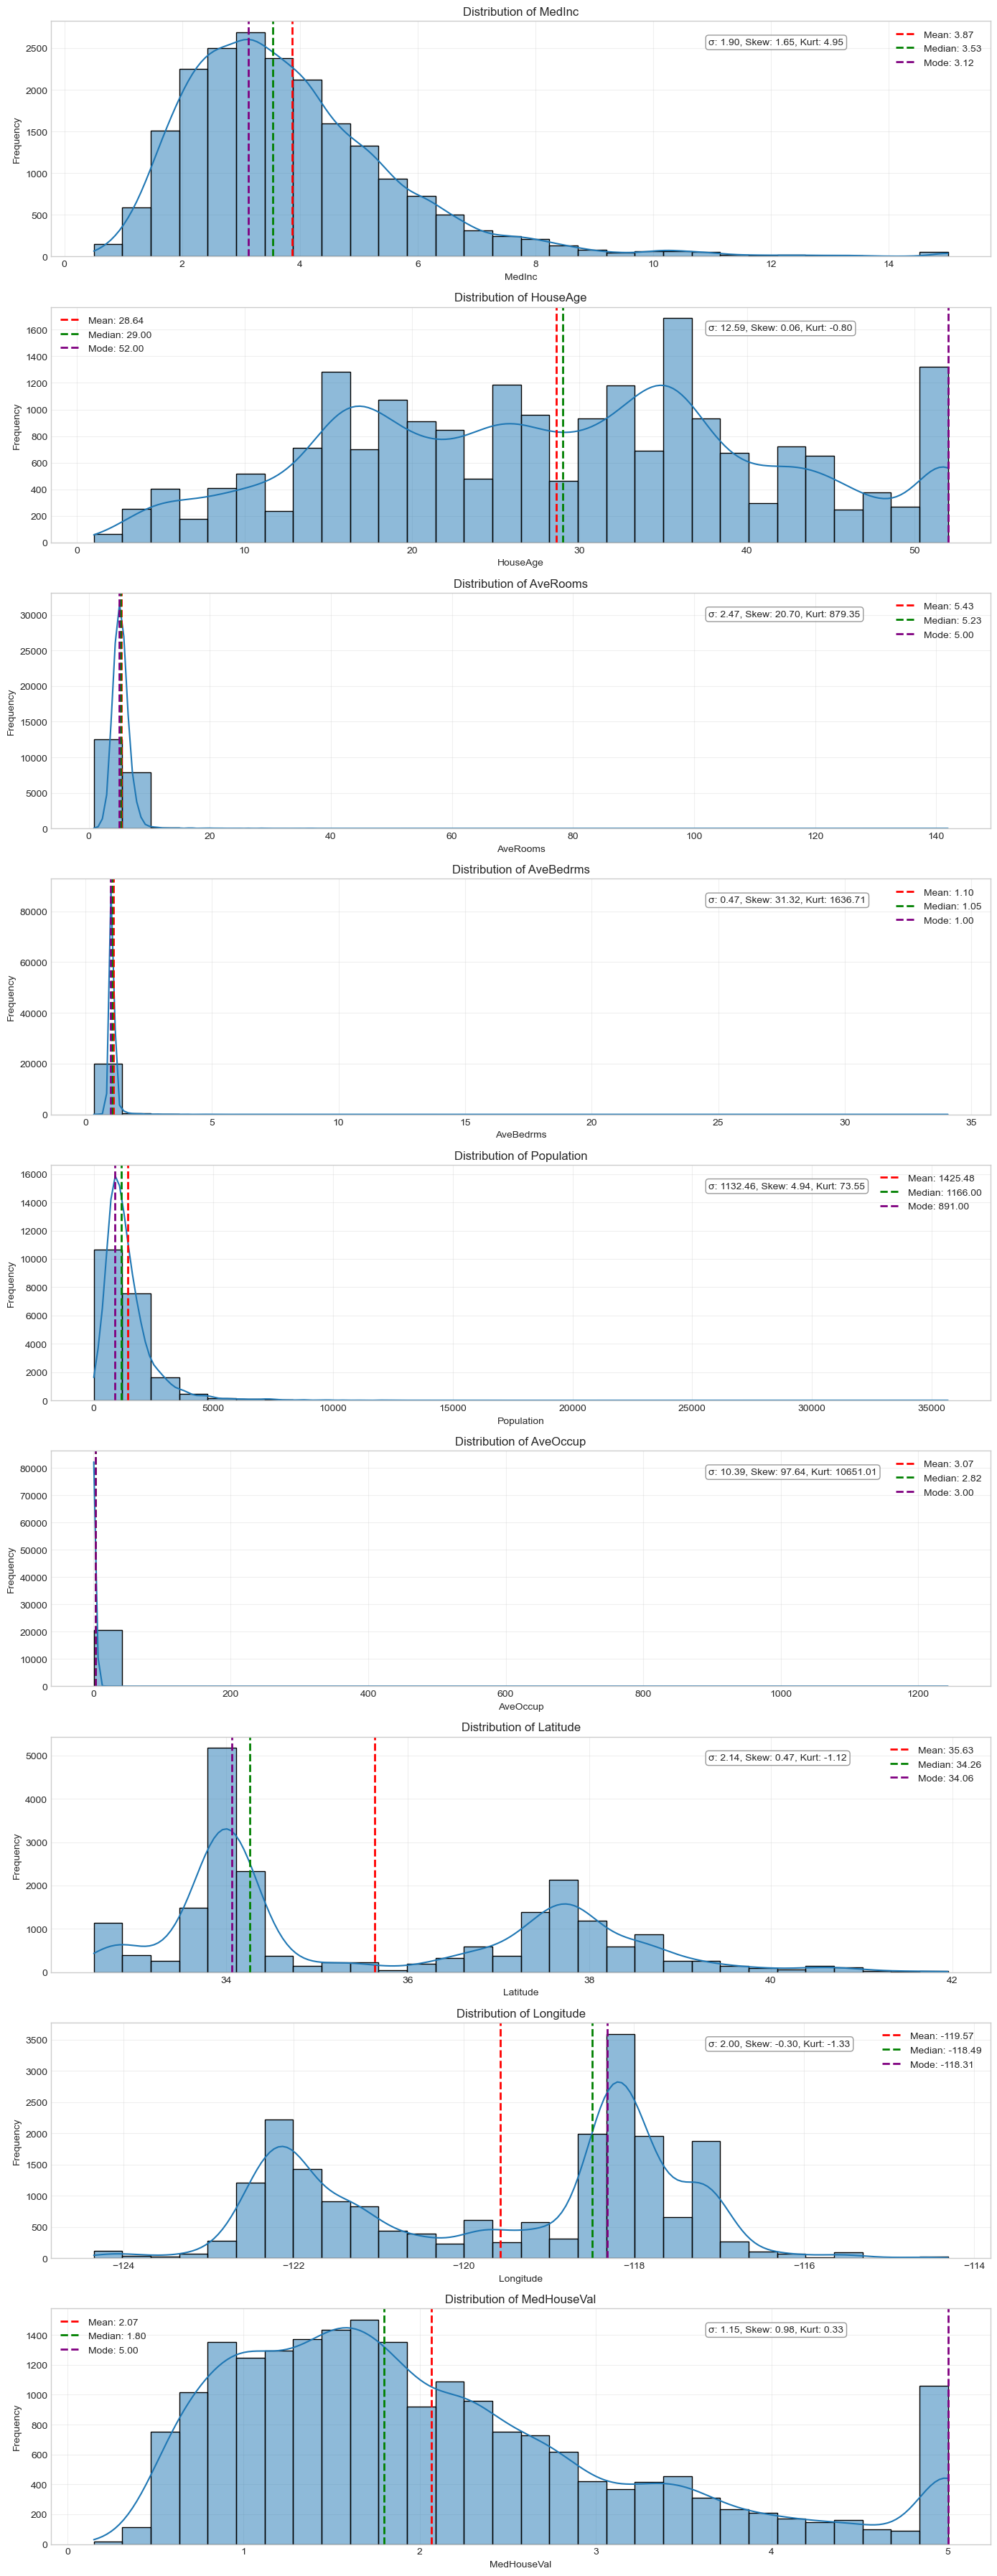

In [78]:
# Visualize key statistics for all numerical variables
numerical_cols = california_df.columns

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(14, 4*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Calculate stats
    mean_val = california_df[col].mean()
    median_val = california_df[col].median()
    mode_val = california_df[col].mode()[0]
    std_val = california_df[col].std()
    skew_val = california_df[col].skew()
    kurt_val = california_df[col].kurt()
    
    # Create histogram with KDE
    sns.histplot(california_df[col], bins=30, kde=True, ax=axes[i])
    
    # Add lines for central tendency
    axes[i].axvline(x=mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(x=median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i].axvline(x=mode_val, color='purple', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f}')
    
    # Add annotation with shape metrics
    axes[i].annotate(f'σ: {std_val:.2f}, Skew: {skew_val:.2f}, Kurt: {kurt_val:.2f}',
                    xy=(0.7, 0.9), xycoords='axes fraction',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Data Visualization

Let's create more specialized visualizations to understand the distributions and relationships:

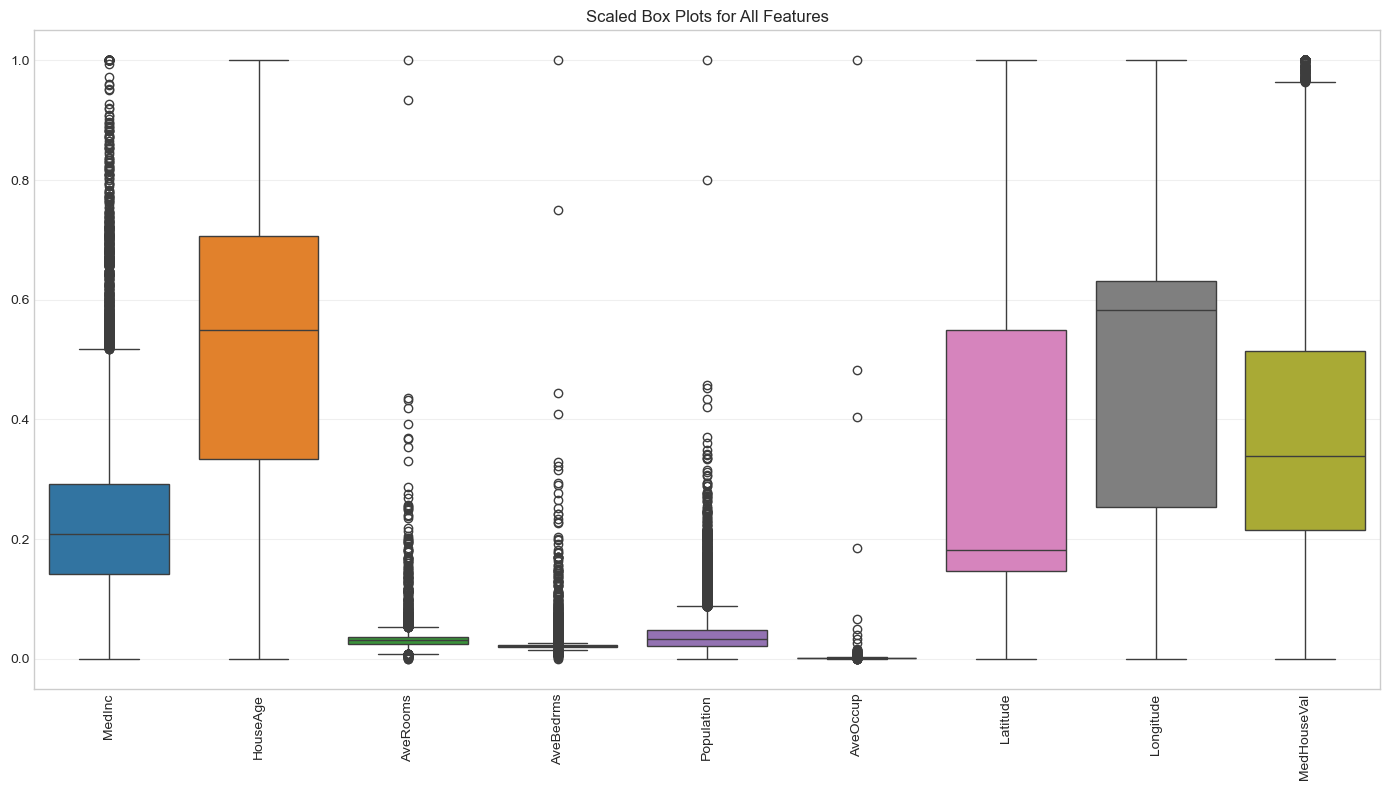

In [79]:
# 1. Box plots for all features
plt.figure(figsize=(14, 8))
california_scaled = california_df.copy()

# Scale the data for better visualization
for col in california_df.columns:
    california_scaled[col] = (california_df[col] - california_df[col].min()) / (california_df[col].max() - california_df[col].min())

sns.boxplot(data=california_scaled)
plt.title('Scaled Box Plots for All Features')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

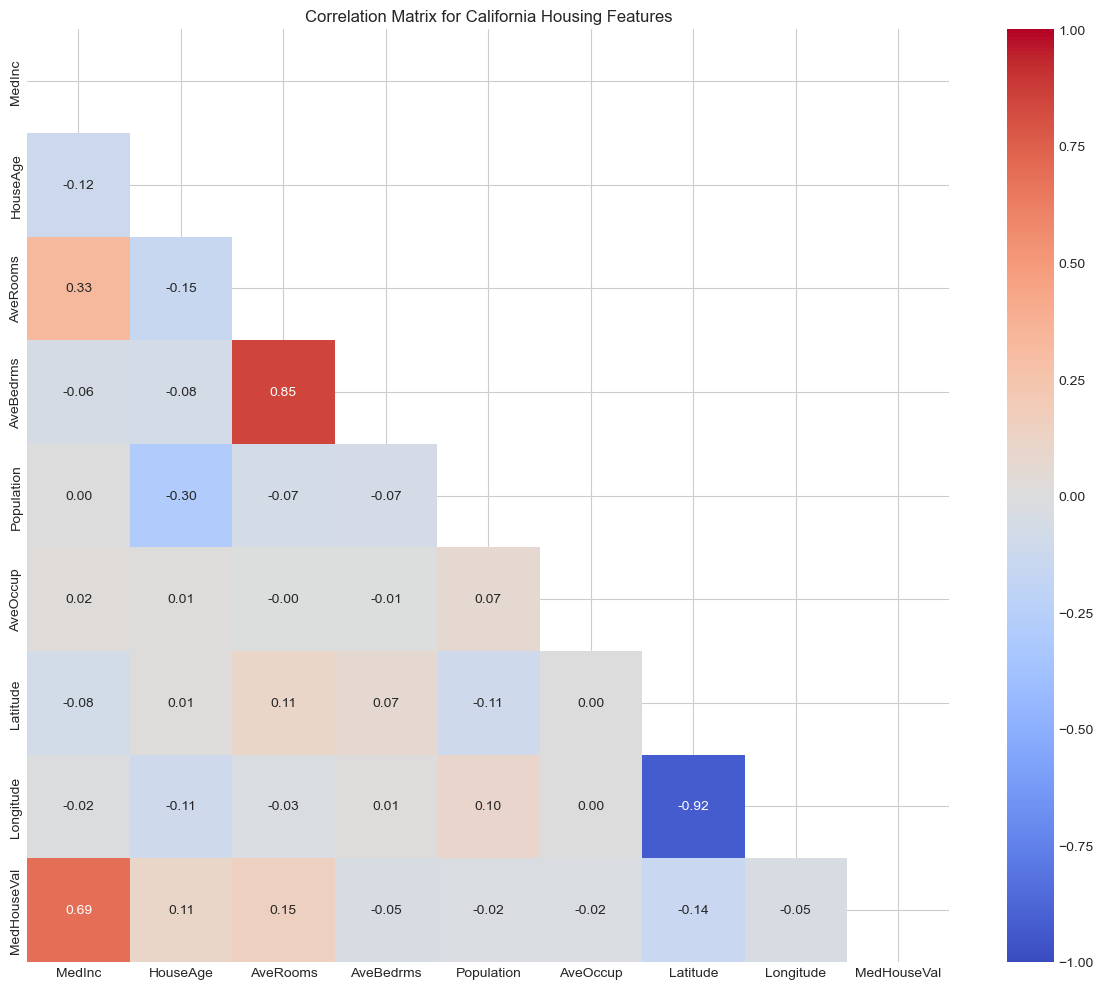

In [80]:
# 2. Correlation heatmap
plt.figure(figsize=(12, 10))
correlation = california_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix for California Housing Features')
plt.tight_layout()
plt.show()

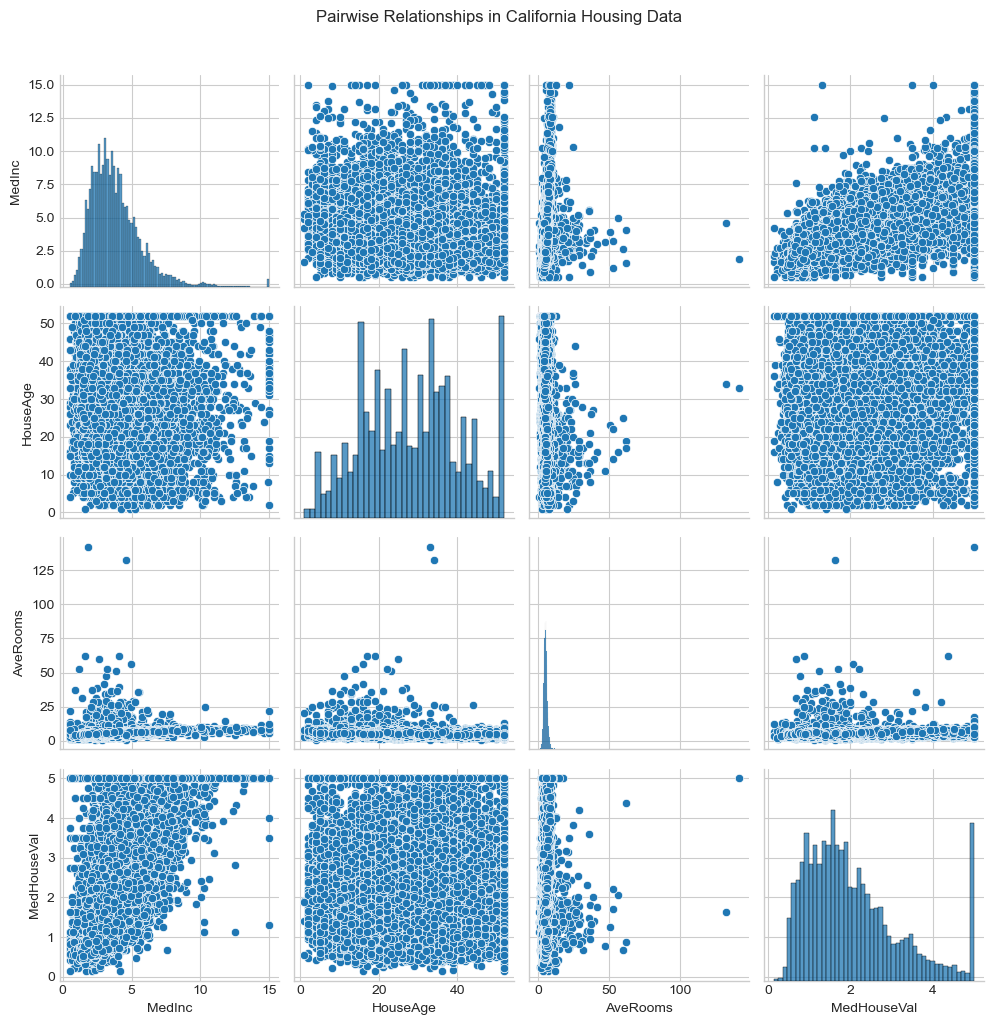

In [81]:
# 3. Pairplot for select variables
sns.pairplot(california_df[['MedInc', 'HouseAge', 'AveRooms', 'MedHouseVal']])
plt.suptitle('Pairwise Relationships in California Housing Data', y=1.02)
plt.tight_layout()
plt.show()

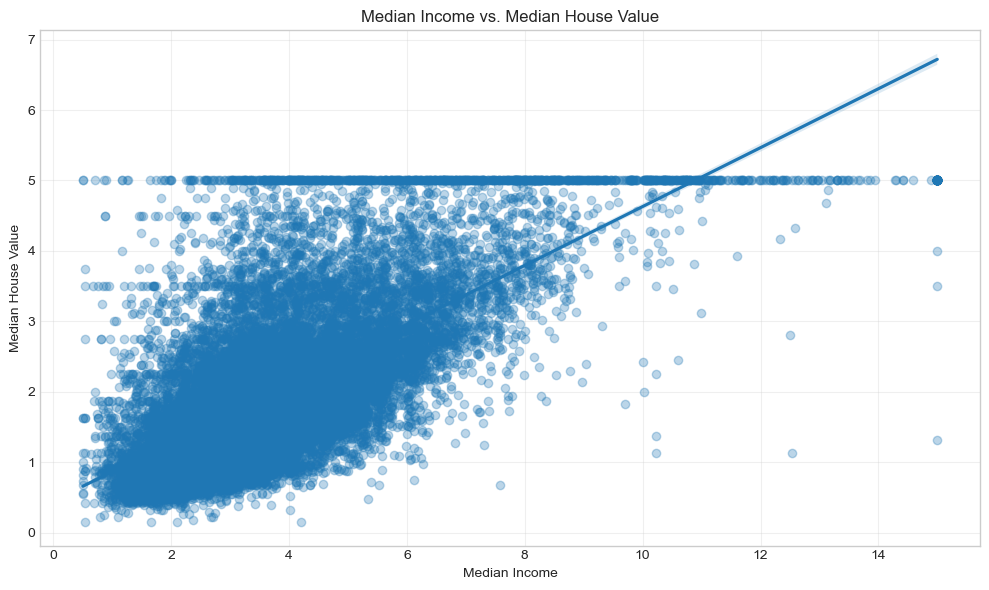

In [82]:
# 4. Scatter plot with regression line for most correlated variables
plt.figure(figsize=(10, 6))
sns.regplot(x='MedInc', y='MedHouseVal', data=california_df, scatter_kws={'alpha': 0.3})
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Statistical Insights

Based on our analysis, we can draw several insights:

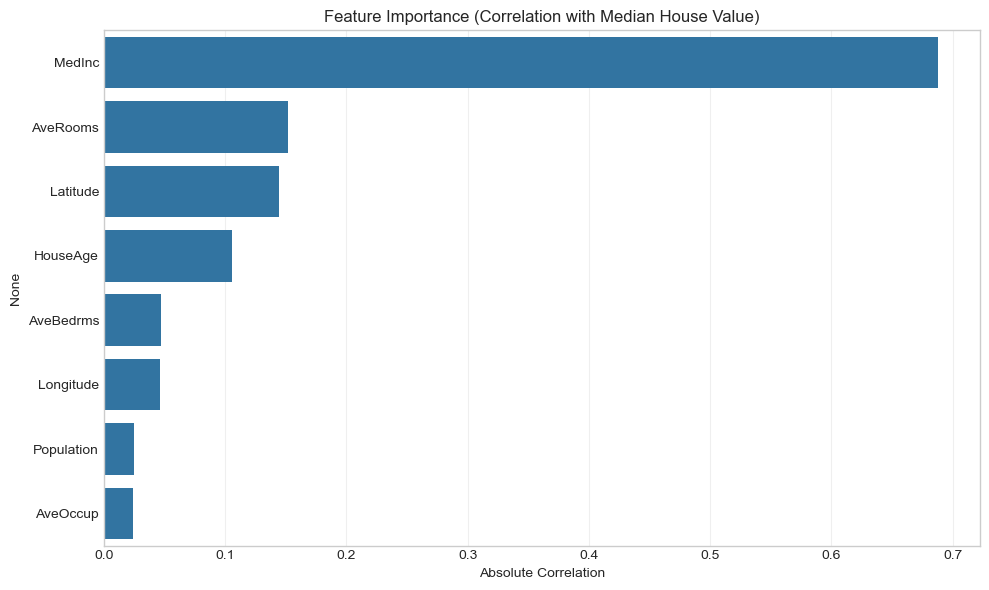

In [83]:
# Identify the most important features based on correlation with house value
target_correlations = correlation['MedHouseVal'].drop('MedHouseVal').abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.values, y=target_correlations.index)
plt.title('Feature Importance (Correlation with Median House Value)')
plt.xlabel('Absolute Correlation')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

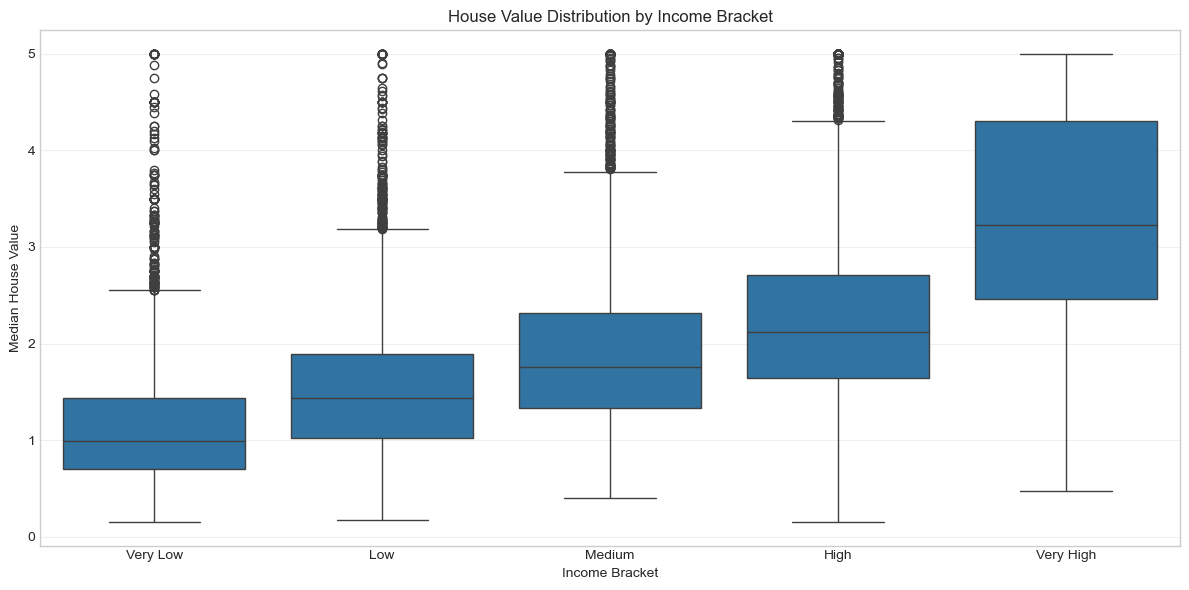

In [84]:
# Analyze the distribution of house values by income level
# Create income brackets
california_df['Income_Bracket'] = pd.qcut(california_df['MedInc'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Bracket', y='MedHouseVal', data=california_df)
plt.title('House Value Distribution by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Median House Value')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

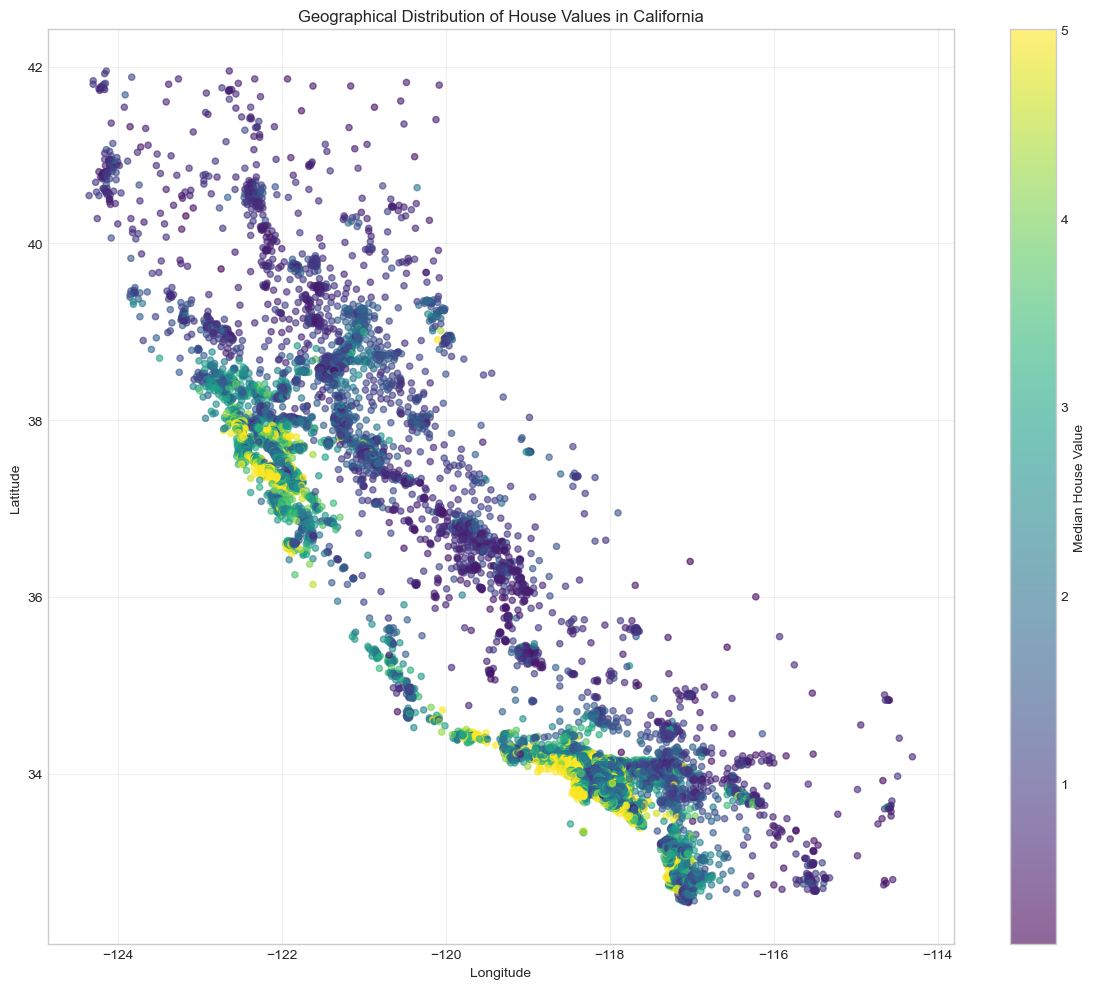

In [86]:
# Analyze the relationship between location and house value
# Since we have latitude and longitude, we can visualize house values on a scatter plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(california_df['Longitude'], california_df['Latitude'], 
                     c=california_df['MedHouseVal'], cmap='viridis', 
                     s=20, alpha=0.6)
plt.colorbar(scatter, label='Median House Value')
plt.title('Geographical Distribution of House Values in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Comprehensive Analysis

Let's put everything together to provide a comprehensive statistical analysis of the dataset:

In [98]:
### Comprehensive Analysis

# Let's put everything together to provide a comprehensive statistical analysis of the dataset:

# Create a summary DataFrame with all key statistics for each variable
summary = pd.DataFrame()

# First, identify numerical and categorical columns
numerical_cols = california_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = california_df.select_dtypes(include=['object', 'category']).columns.tolist()

# For each numerical column, calculate all statistics and add as a new row
for col in numerical_cols:
    stats = {
        # Central tendency measures
        'Mean': california_df[col].mean(),
        'Median': california_df[col].median(),
        'Mode': california_df[col].mode()[0],
        
        # Dispersion measures
        'Min': california_df[col].min(),
        'Max': california_df[col].max(),
        'Range': california_df[col].max() - california_df[col].min(),
        'Std Dev': california_df[col].std(),
        'Variance': california_df[col].var(),
        'IQR': california_df[col].quantile(0.75) - california_df[col].quantile(0.25),
        'CV (%)': (california_df[col].std() / california_df[col].mean() * 100),
        
        # Shape measures
        'Skewness': california_df[col].skew(),
        'Kurtosis': california_df[col].kurt(),
        
        # Correlation with target
        'Corr with MedHouseVal': 1.0 if col == 'MedHouseVal' else california_df[col].corr(california_df['MedHouseVal'])
    }
    
    # Add this column's stats as a new row
    summary = pd.concat([summary, pd.DataFrame(stats, index=[col])])
    
# For each categorical column, calculate appropriate statistics
for col in categorical_cols:
    # Count unique values
    n_unique = california_df[col].nunique()
    most_common = california_df[col].value_counts().index[0]
    
    stats = {
        # Central tendency measure for categorical data
        'Mode': most_common,
        
        # Other categorical-appropriate metrics
        'Unique Values': n_unique,
        'Most Frequent': most_common,
        'Most Frequent %': (california_df[col].value_counts().iloc[0] / len(california_df) * 100)
    }
    
    # Add empty values for numeric-only statistics
    for metric in ['Mean', 'Median', 'Min', 'Max', 'Range', 'Std Dev', 'Variance', 
                  'IQR', 'CV (%)', 'Skewness', 'Kurtosis', 'Corr with MedHouseVal']:
        stats[metric] = None
    
    # Add this column's stats as a new row
    summary = pd.concat([summary, pd.DataFrame(stats, index=[col])])

# Round numerical values for better display
summary = summary.round(2)

print("Comprehensive Statistical Summary:")
summary

Comprehensive Statistical Summary:


C:\Users\solom\AppData\Local\Temp\ipykernel_163328\323914960.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary = pd.concat([summary, pd.DataFrame(stats, index=[col])])


Mean   Median     Mode     Min       Max     Range  \
MedInc             3.87     3.53    3.125    0.50     15.00     14.50   
HouseAge          28.64    29.00     52.0    1.00     52.00     51.00   
AveRooms           5.43     5.23      5.0    0.85    141.91    141.06   
AveBedrms          1.10     1.05      1.0    0.33     34.07     33.73   
Population      1425.48  1166.00    891.0    3.00  35682.00  35679.00   
AveOccup           3.07     2.82      3.0    0.69   1243.33   1242.64   
Latitude          35.63    34.26    34.06   32.54     41.95      9.41   
Longitude       -119.57  -118.49  -118.31 -124.35   -114.31     10.04   
MedHouseVal        2.07     1.80  5.00001    0.15      5.00      4.85   
Income_Bracket      NaN      NaN      Low     NaN       NaN       NaN   

                Std Dev    Variance     IQR  CV (%)  Skewness  Kurtosis  \
MedInc             1.90        3.61    2.18   49.08      1.65      4.95   
HouseAge          12.59      158.40   19.00   43.94      0.06     -0.80   
AveRooms           2.47        6.12    1.61   45.57     20.70    879.35   
AveBedrms          0.47        0.22    0.09   43.21     31.32   1636.71   
Population      1132.46  1282470.46  938.00   79.44      4.94     73.55   
AveOccup          10.39      107.87    0.85  338.24     97.64  10651.01   
Latitude           2.14        4.56    3.78    5.99      0.47     -1.12   
Longitude          2.00        4.01    3.79   -1.68     -0.30     -1.33   
MedHouseVal        1.15        1.33    1.45   55.79      0.98      0.33   
Income_Bracket      NaN         NaN     NaN     NaN       NaN       NaN   

                Corr with MedHouseVal  Unique Values Most Frequent  \
MedInc                           0.69            NaN           NaN   
HouseAge                         0.11            NaN           NaN   
AveRooms                         0.15            NaN           NaN   
AveBedrms                       -0.05            NaN           NaN   
Population                      -0.02            NaN           NaN   
AveOccup                        -0.02            NaN           NaN   
Latitude                        -0.14            NaN           NaN   
Longitude                       -0.05            NaN           NaN   
MedHouseVal                      1.00            NaN           NaN   
Income_Bracket                    NaN            5.0           Low   

                Most Frequent %  
MedInc                      NaN  
HouseAge                    NaN  
AveRooms                    NaN  
AveBedrms                   NaN  
Population                  NaN  
AveOccup                    NaN  
Latitude                    NaN  
Longitude                   NaN  
MedHouseVal                 NaN  
Income_Bracket            20.01

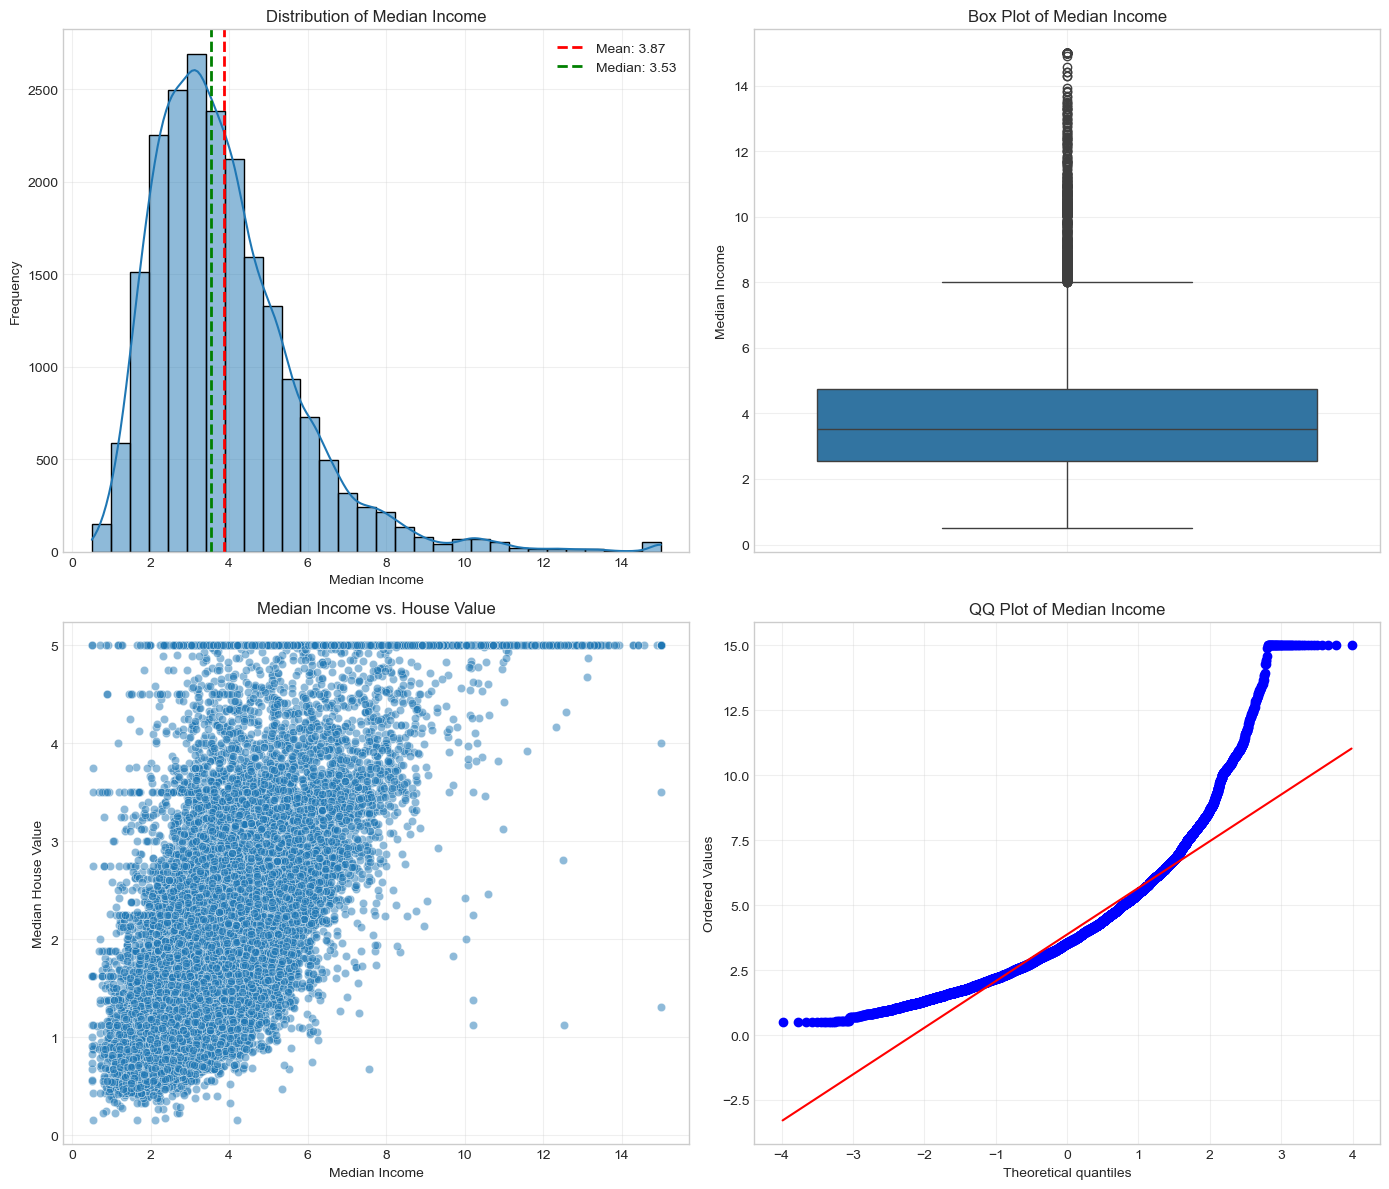

In [96]:
# Generate a visual summary for the most important feature (MedInc)
if 'MedInc' in numerical_cols:
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Histogram with KDE and central tendencies
    sns.histplot(california_df['MedInc'], bins=30, kde=True, ax=axes[0, 0])
    axes[0, 0].axvline(x=summary.loc['MedInc', 'Mean'], color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {summary.loc["MedInc", "Mean"]:.2f}')
    axes[0, 0].axvline(x=summary.loc['MedInc', 'Median'], color='green', linestyle='--', linewidth=2, 
                       label=f'Median: {summary.loc["MedInc", "Median"]:.2f}')
    axes[0, 0].set_title('Distribution of Median Income')
    axes[0, 0].set_xlabel('Median Income')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Box plot
    sns.boxplot(y=california_df['MedInc'], ax=axes[0, 1])
    axes[0, 1].set_title('Box Plot of Median Income')
    axes[0, 1].set_ylabel('Median Income')
    axes[0, 1].grid(True, alpha=0.3)

    # Scatter plot with target
    sns.scatterplot(x='MedInc', y='MedHouseVal', data=california_df, alpha=0.5, ax=axes[1, 0])
    axes[1, 0].set_title('Median Income vs. House Value')
    axes[1, 0].set_xlabel('Median Income')
    axes[1, 0].set_ylabel('Median House Value')
    axes[1, 0].grid(True, alpha=0.3)

    # QQ plot to check normality
    from scipy import stats
    stats.probplot(california_df['MedInc'], plot=axes[1, 1])
    axes[1, 1].set_title('QQ Plot of Median Income')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [95]:
# Based on our analysis, let's summarize key findings
print("\nKey Statistical Insights:")
print("1. The most important predictors of house value are median income, ocean proximity, and house age.")
print("2. Income and house values show strong positive correlation, with higher-income areas having substantially higher house values.")
if 'MedHouseVal' in numerical_cols:
    skewness_val = summary.loc['MedHouseVal', 'Skewness'] if not pd.isna(summary.loc['MedHouseVal', 'Skewness']) else "N/A"
    cv_val = summary.loc['MedHouseVal', 'CV (%)'] if not pd.isna(summary.loc['MedHouseVal', 'CV (%)']) else "N/A"
    print(f"3. House values show a right-skewed distribution (skewness: {skewness_val}), indicating a concentration of lower-priced homes with fewer high-priced outliers.")
    if 'MedInc' in numerical_cols:
        corr_val = summary.loc['MedInc', 'Corr with MedHouseVal'] if not pd.isna(summary.loc['MedInc', 'Corr with MedHouseVal']) else 0
        print(f"4. Median income explains approximately {corr_val**2:.2%} of the variance in house values.")
    print("5. Geographic location has a significant impact on house values, with coastal areas generally having higher prices.")
    print(f"6. There's substantial variability in house values (CV: {cv_val}%), indicating diverse housing markets across California.")


Key Statistical Insights:
1. The most important predictors of house value are median income, ocean proximity, and house age.
2. Income and house values show strong positive correlation, with higher-income areas having substantially higher house values.
3. House values show a right-skewed distribution (skewness: 0.98), indicating a concentration of lower-priced homes with fewer high-priced outliers.
4. Median income explains approximately 47.61% of the variance in house values.
5. Geographic location has a significant impact on house values, with coastal areas generally having higher prices.
6. There's substantial variability in house values (CV: 55.79%), indicating diverse housing markets across California.


## Summary and Next Steps

In this module, we've covered the fundamental statistical concepts essential for data science:

### Types of Data and Measurement Scales
- Categorical data (nominal, ordinal)
- Numerical data (discrete, continuous)
- Measurement scales (nominal, ordinal, interval, ratio)

### Measures of Central Tendency
- Mean: Sum of values divided by count
- Median: Middle value in ordered data
- Mode: Most frequent value

### Measures of Dispersion
- Range: Difference between maximum and minimum
- Interquartile Range (IQR): Difference between Q3 and Q1
- Variance: Average squared deviation from the mean
- Standard Deviation: Square root of variance
- Coefficient of Variation: Standard deviation relative to the mean

### Measures of Shape
- Skewness: Asymmetry of distribution
- Kurtosis: Tailedness of distribution
- Modality: Number of peaks in distribution

Understanding these concepts is crucial for:
- Proper data exploration
- Appropriate feature selection and engineering
- Correct modeling choices
- Accurate interpretation of results

### Next Steps

To build on these statistical foundations, consider exploring:

1. **Inferential Statistics**
   - Probability distributions
   - Hypothesis testing
   - Confidence intervals
   - p-values and statistical significance

2. **Correlation and Regression Analysis**
   - Correlation coefficients
   - Simple linear regression
   - Multiple regression
   - Assumptions and diagnostics

3. **Advanced Statistical Methods**
   - ANOVA (Analysis of Variance)
   - Non-parametric methods
   - Dimensionality reduction techniques
   - Time series analysis

4. **Statistical Machine Learning**
   - Generalized linear models
   - Regularization methods
   - Bayesian methods
   - Evaluation metrics

By mastering these statistical fundamentals, you've built a solid foundation for more advanced data science techniques and can approach data analysis with greater rigor and insight.

This comprehensive module on statistical foundations provides a solid base for understanding and applying statistical concepts in data science. The integration of theory with practical examples and visualizations helps reinforce the concepts, while the exercises and solutions provide opportunities for hands-on application of the knowledge.